# K_Folding and Producing Classifers:

#### Preparing Classifier Data:

In [1]:
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Produce Signal and Background DataFrame (All of Signal and 0,1,2 of MagUp and MagDown of Data) (default PID Cuts have already been applied)

df_Signal_Xicc = uproot.open('/home/bonacci/Data/Xicc_MC_Train.root:tree').arrays(library = 'pd')
# df_Signal_Xicc = df_Signal_Xicc.astype('float32')  # Convert to float32

df_Signal_Lc = uproot.open('/home/bonacci/Data/Lc_MC_Train.root:tree').arrays(['Lc_M'], library='pd')
# df_Signal_Lc = df_Signal_Lc.astype('float32')  # Convert to float32

df_Background_Xicc = uproot.open('/home/bonacci/Data/Xicc_Data_Train.root:tree').arrays(library = 'pd')
# df_Background_Xicc = df_Background_Xicc.astype('float32')  # Convert to float32

df_Background_Lc = uproot.open('/home/bonacci/Data/Lc_Data_Train.root:tree').arrays(['Lc_M'], library = 'pd')
# df_Background_Lc = df_Background_Lc.astype('float32')  # Convert to float32

Searches for the $\Xi_{\mathrm{cc}}^{++} \rightarrow \Lambda_{\mathrm{c}}^{+}\left(\rightarrow p K^{-} \pi^{+}\right) K^{-} \pi^{+} \pi^{+}$ decay mode at the LHCb detector have been presented before (such as in \cite{Observation of the doubly charmed baryon $\Xi_{cc}^{++}$}), the topology of wh8ich can be seen below:

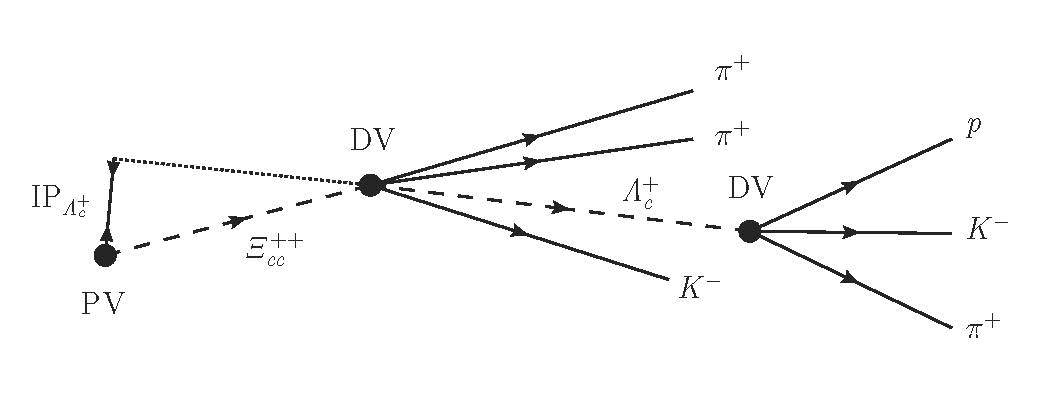

In [2]:
from IPython.display import Image
image_path = "DecayTree.jpg"
Image(filename=image_path)

In [7]:
# Add sideband cut:
cut_Data_mass_Xicc = (df_Background_Xicc['Xicc_M']>3700.0)

This is achieved by analysing the $\Xi_{cc}^{++}$ baryon decaying weakly to a singly charmed $\Lambda_{c}^{+}$ baryon, a $K^{-}$ meson and two $\pi^{+}$ mesons, with the $\Lambda_{\mathrm{c}}^{+}$ baryon further then decaying to a proton, $K^{-}$ meson and $\pi^{+}$ meson. 

The search was motivated from the potential Double Parton Scattering (DPS) role in the production of the doubly heavy hadrons. The doubly heavy hadrons can be formed of course from a Single Parton Scattering (SPS) process or from a DPS process, as heavyy quarks (due to theuir large masses) can only be formed through the perturbative Quantum Chromodynamics (pQCD) mechanisms. A look into the role that DPS takes in producing doubly heavy quarks such as the $\Xi_{cc}^{++}$ through PYTHIA simualtion data unveils the potential to unveil the underlying processes which dominate; either a purely SPS process, or a combination of the both SPS and DPS processes. To investigate the role of SPS and DPS contributions, the ratio of the cross sections of doubly heavy hadrons (such as the $\Xi_{cc}^{++}$), can be compared to the corresponding ratio singly heavy hadrons(as its name implies, hadrons like $\Lambda_{c}^{+}$, which only contain a single heavy quark). It is especially important to look at this ratio as a function of the number of parton-parton interactions in a collision as we expect that a DPS cross section is correlated to the product of two SPS cross sections. Hence, if an SPS process the cross section will look linear, the DPS process will look quadratic (requiring effectively two SPS processes to occur independently). Hence by creating this ratio between the $\Xi_{cc}^{++}$ and $\Lambda_{c}^{+}$ cross sections, we are able to determine if we have a linear trend (DPS process) or a flat trend (SPS process). We can test our hypotheses by looking at the ratio.

The data used in this measurement correspond to an integrated luminosity of 2.2 $fb^{−1}$ collected at 13 $TeV$, recorded by the LHCb experiment during 2018. All the data was investigated in an event selection based process such that only reconstructed $\Xi_{cc}^{++}$ and $\Lambda_{c}^{+}$ baryons which are in appropriate mass regions are passed. The analysis is developed around collected PYTHIA simulated samples of the $\Xi_{\mathrm{cc}}^{++} \rightarrow \Lambda_{\mathrm{c}}^{+} K^{-} \pi^{+} \pi^{+}$ decays, and the LHCb data set recorded 2018.

The simulated data is generated with a predicted mass value of the $\Xi_{cc}^{++}$ baryon which is taken from theory, while the $\Lambda_{c}^{+}$ is predicted based the best information of $\Lambda_{\mathrm{c}}^{+} \rightarrow p K^{-} \pi^{+}$ decays.

The main dataset is reconstructed in the trigger level, and further requirements are imposed on the data. A multivariate selection is then used to exploit the difference between signal and background events, to then decipher the signal events from data. The 'classifers' used to find these differences are trained on the simulated sample data and (a fraction of) the LHCb data.

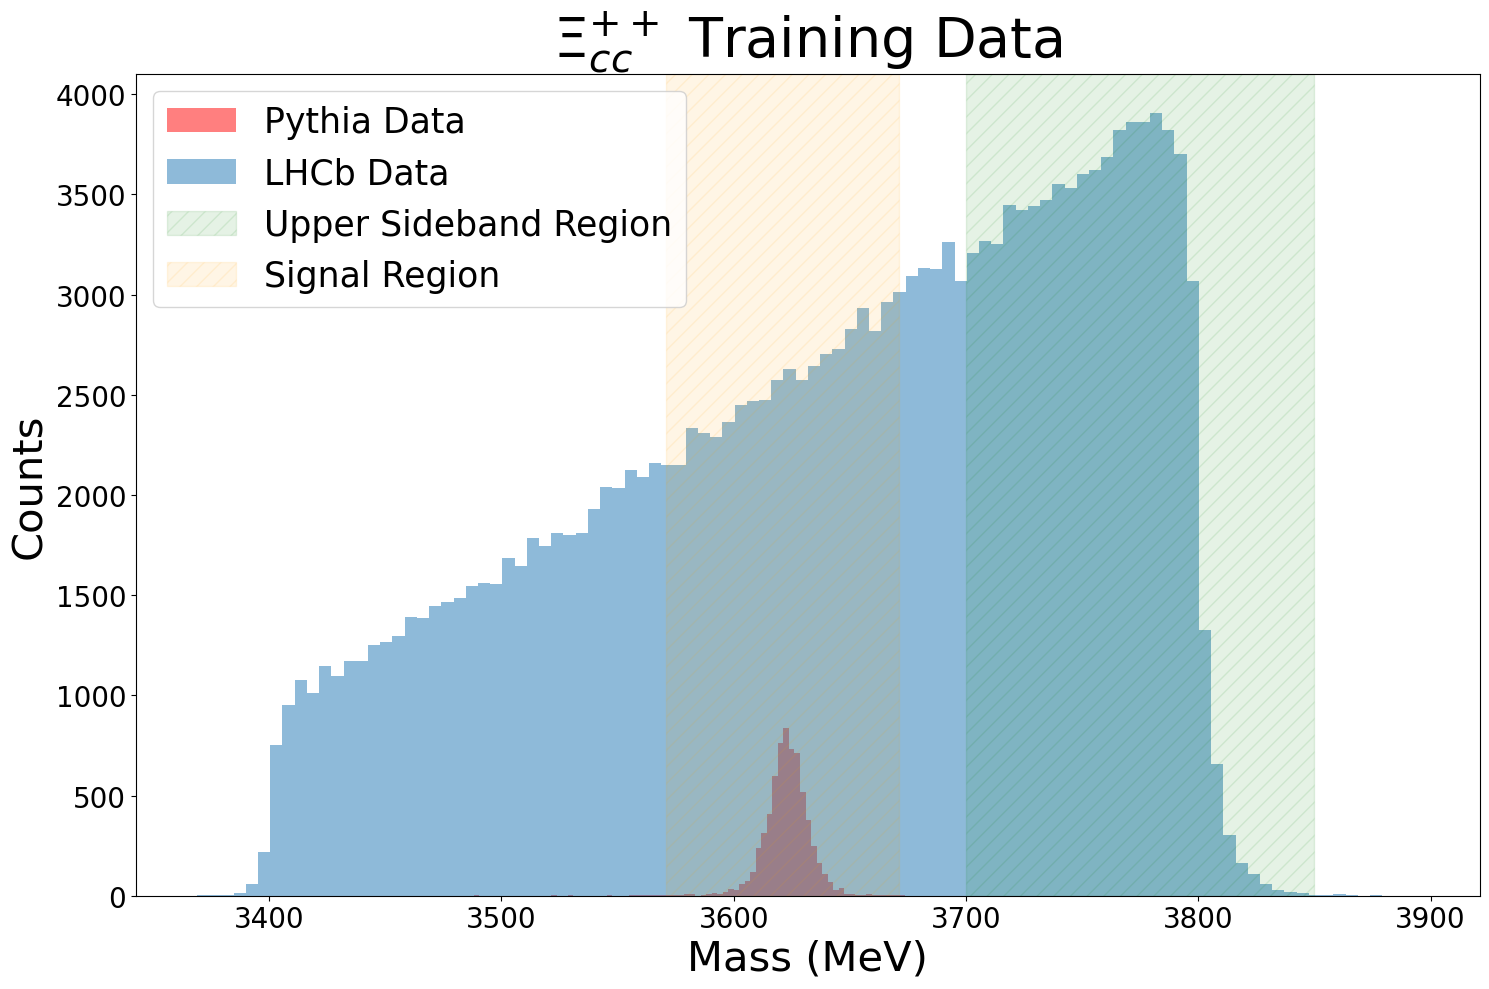

In [4]:
# Preparing Training/Testing Signal and Background DataFrame:

def Prepare_Training(df):
    cuts = (df["Xicc_IPCHI2_OWNPV"]>0) & (df["Xicc_DIRA_OWNPV"]>-1) & (df["Xicc_DIRA_OWNPV"]<1) & (df["Xicc_FDCHI2_OWNPV"]>0) & (df["Lc_ENDVERTEX_NDOF"]!=0) & (df["Xicc_ENDVERTEX_NDOF"]!=0) & (df["Xicc_MassFit_nDOF"]!=0) & (df['XiccK_IPCHI2_OWNPV']>0) & (df['XiccPi1_IPCHI2_OWNPV']>0) & (df['XiccPi2_IPCHI2_OWNPV']>0) & (df['Lc_IPCHI2_OWNPV']>0) & (df['XiccK_IPCHI2_OWNPV']>0)
    return df[cuts].copy()

df_Signal_Xicc = Prepare_Training(df_Signal_Xicc)
df_Background_Xicc = Prepare_Training(df_Background_Xicc)
# Signal and Background Xicc Mass Histogram:

fig, axs = plt.subplots(figsize=(15, 10))
axs.hist(df_Signal_Xicc['Xicc_M'], bins=100, color = 'red', alpha=0.5, label= 'Pythia Data')
axs.hist(df_Background_Xicc['Xicc_M'], bins=100, alpha=0.5, label= 'LHCb Data')
axs.set_title('$\Xi_{cc}^{++}$ Training Data', fontsize=40)
axs.set_xlabel('Mass (MeV)', fontsize=30)
axs.set_ylabel('Counts', fontsize=30)
axs.tick_params(axis='both', which='major', labelsize=20)
axs.axvspan(3700, 3850, color='green', alpha=.1, hatch='//', label = 'Upper Sideband Region')
axs.axvspan(3621-50,3621+50, color='orange', alpha=.1, hatch='//', label = 'Signal Region')


axs.legend(fontsize=25)


plt.tight_layout()
plt.savefig('/home/bonacci/Results/Xicc_M_Training_Data.pdf')
plt.show()

In [4]:
print(len(df_Signal_Xicc),len(df_Signal_Lc),len(df_Background_Xicc),len(df_Background_Xicc[cut_Data_mass_Xicc]),len(df_Background_Lc))

6654 83595 186309 70433 2257371


In [8]:
df_Background_Xicc = df_Background_Xicc[cut_Data_mass_Xicc].copy()

#### The variables used to train the classifiers are as such:

\begin{array}{|l|}
\hline \text { Training variables } \\
\hline \text { 1) } \log \left(\chi_{\mathrm{IP}}^2\right) \text { of } \Xi_{\mathrm{cc}}^{++} \text {to its PV } \\
\text { 2) } \cos ^{-1}\left(\text { DIRA) of } \Xi_{\mathrm{cc}}^{++}\right. \text {to its PV } \\
\text { 3) } \log \left(\mathrm{FD} \chi^2\right) \text { of } \Xi_{\mathrm{cc}}^{++} \text {from its PV } \\
\text { 4) } \chi_{\mathrm{vtx}}^2 / \text { ndf of the } \Lambda_{\mathrm{c}}^{+} \text {vertex fit } \\
\text { 5) } \chi_{\mathrm{vtx}}^2 / \text { ndf of the } \Xi_{\mathrm{cc}}^{++} \text {vertex fit (no DTF refit) } \\
\text { 6) } \chi_{\mathrm{vtx}}^2 / \text { ndf of the } \Xi_{\mathrm{cc}}^{++} \text {vertex fit (DTF refit with } \Xi_{\mathrm{cc}}^{++} \text {PV constraint) } \\
\text { 7) Smallest } \log \left(\chi_{\mathrm{IP}}^2\right) \text { among the daughters }\left(\Lambda_{\mathrm{c}}^{+}, K^{-}, \pi^{+} \text {and } \pi^{+}\right) \text {of the } \Xi_{\mathrm{cc}}^{++} \\
\text {8) Scalar } p_{\mathrm{T}} \text { sum of the daughters }\left(\Lambda_{\mathrm{c}}^{+}, K^{-}, \pi^{+} \text {and } \pi^{+}\right) \text {of the } \Xi_{\mathrm{cc}}^{++} \\
\text {9) Smallest } p_{\mathrm{T}} \text { among the daughters }\left(\Lambda_{\mathrm{c}}^{+}, K^{-}, \pi^{+} \text {and } \pi^{+}\right) \text {of the } \Xi_{\mathrm{cc}}^{++} \\
\text {10) Smallest } p_{\mathrm{T}} \text { among the final daughters of the } \Lambda_{\mathrm{c}}^{+} \\
\hline
\end{array}

In [9]:
# Create Training Variables:

def Create_Train(df):
    
    # 1:
    df["LOG[Xicc_IPCHI2_OWNPV]"] = np.log(df["Xicc_IPCHI2_OWNPV"])
    # 2:
    df["COS^{-1}[Xicc_DIRA_OWNPV]"] = np.arccos(df["Xicc_DIRA_OWNPV"])
    # 3:
    df["LOG[Xicc_FDCHI2_OWNPV]"] = np.log(df["Xicc_FDCHI2_OWNPV"])
    # 4:
    df["Lc_ENDVERTEX_CHI2/NDOF"] = df["Lc_ENDVERTEX_CHI2"] / df["Lc_ENDVERTEX_NDOF"]
    # 5:
    df["Xicc_ENDVERTEX_CHI2/NDOF"] = df["Xicc_ENDVERTEX_CHI2"] / df["Xicc_ENDVERTEX_NDOF"]
    # 6:
    df["Xicc_MassFit_chi2/nDOF"] = df["Xicc_MassFit_chi2"] / df["Xicc_MassFit_nDOF"]
    # 7:
    columns_to_check = ['XiccK_IPCHI2_OWNPV', 'XiccPi1_IPCHI2_OWNPV', 'XiccPi2_IPCHI2_OWNPV', 'Lc_IPCHI2_OWNPV']
    df['Xicc_MIN_IPCHI2_OWNPV'] = np.log(df[columns_to_check]).min(axis=1)
    # 8:
    columns_to_check = ["XiccK_PT", "XiccPi1_PT", "XiccPi2_PT", "Lc_PT"]
    df['Xicc_SUM_PT'] = df[columns_to_check].sum(axis=1)
    # 9:
    columns_to_check = ["XiccK_PT", "XiccPi1_PT", "XiccPi2_PT", "Lc_PT"]
    df['Xicc_MIN_PT'] = df[columns_to_check].min(axis=1)
    # 10:
    columns_to_check = ["LcK_PT", "LcPi_PT", "LcP_PT"]
    df['Lc_MIN_PT'] = df[columns_to_check].min(axis=1)
    return df

# Prepare data for training:

# Create Signal and Background training variables:

df_Signal_Xicc = Create_Train(df_Signal_Xicc)
df_Background_Xicc = Create_Train(df_Background_Xicc)

# Signal: (1's)

# Signal Xicc data:
df_Signal_Xicc["labels"] = 1

# Background: (0's)

# Background Xicc data:
df_Background_Xicc["labels"] = 0

# Training Variables for Xicc:

training_variables_Xicc = ["LOG[Xicc_IPCHI2_OWNPV]", "COS^{-1}[Xicc_DIRA_OWNPV]", "LOG[Xicc_FDCHI2_OWNPV]", "Lc_ENDVERTEX_CHI2/NDOF", 
                      "Xicc_ENDVERTEX_CHI2/NDOF", "Xicc_MassFit_chi2/nDOF", 'Xicc_MIN_IPCHI2_OWNPV', 'Xicc_SUM_PT', 
                      'Xicc_MIN_PT', 'Lc_MIN_PT']
                      
# Defining the parameter kept uniform and the other parameters being trained:

uniform_variables  = ["Xicc_OWNPV_NDOF"]

df = pd.concat([df_Signal_Xicc, df_Background_Xicc], ignore_index=False)

# Randomizes Data:
df = df.sample(frac=1).reset_index(drop=True)

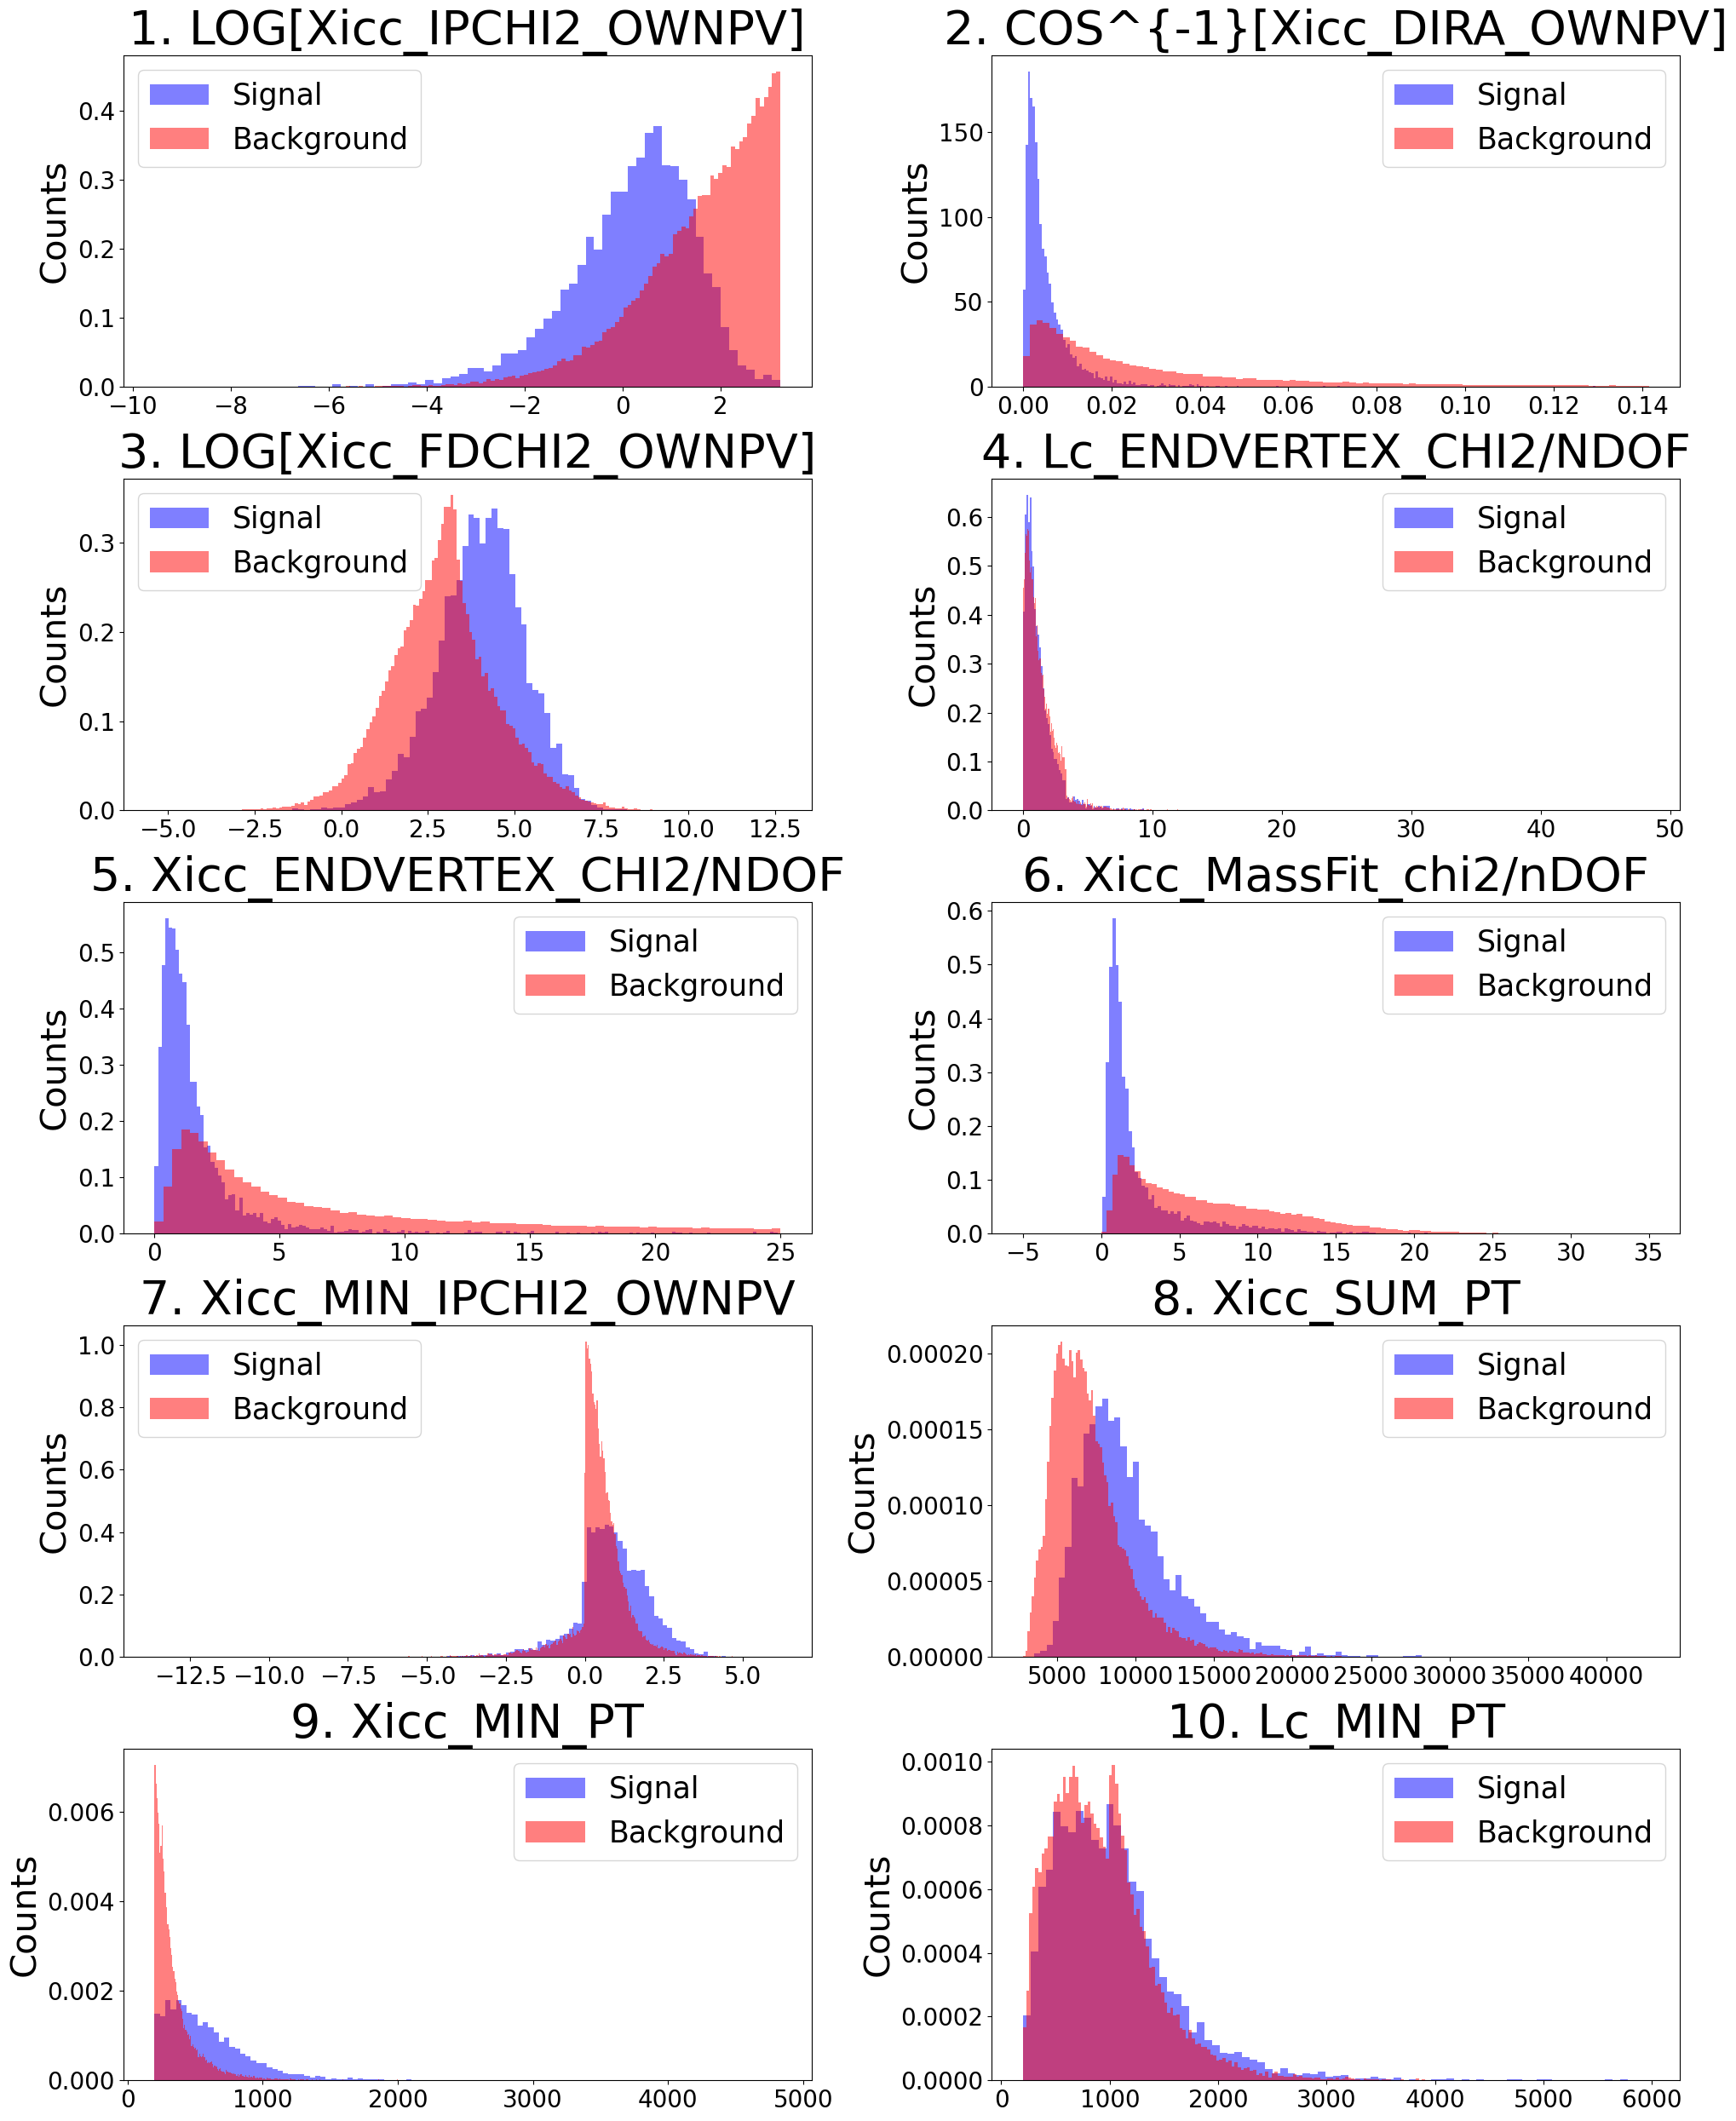

In [10]:
# Assuming there are 10 training variables
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 25))

for i, variable in enumerate(training_variables_Xicc):
    # Determine the row and column index
    row = i // 2
    col = i % 2
    
    # Plot histogram for the filtered Signal data
    axes[row, col].hist(df[df['labels'] == 1][variable], bins='fd', color='blue', alpha=0.5, label='Signal', density=True)
    
    # Plot histogram for the filtered Background data
    axes[row, col].hist(df[df['labels'] == 0][variable], bins='fd', color='red', alpha=0.5, label='Background', density=True)
    
    # Add enumeration to the title
    axes[row, col].set_title(f'{i+1}. {variable}', fontsize=40)
    axes[row, col].set_ylabel('Counts', fontsize=30)
    axes[row, col].legend(fontsize=25)
    axes[row, col].tick_params(axis='both', which='major', labelsize=20)

plt.tight_layout()
plt.savefig('/home/bonacci/Results/Training_features_signal_background.pdf')
plt.show()


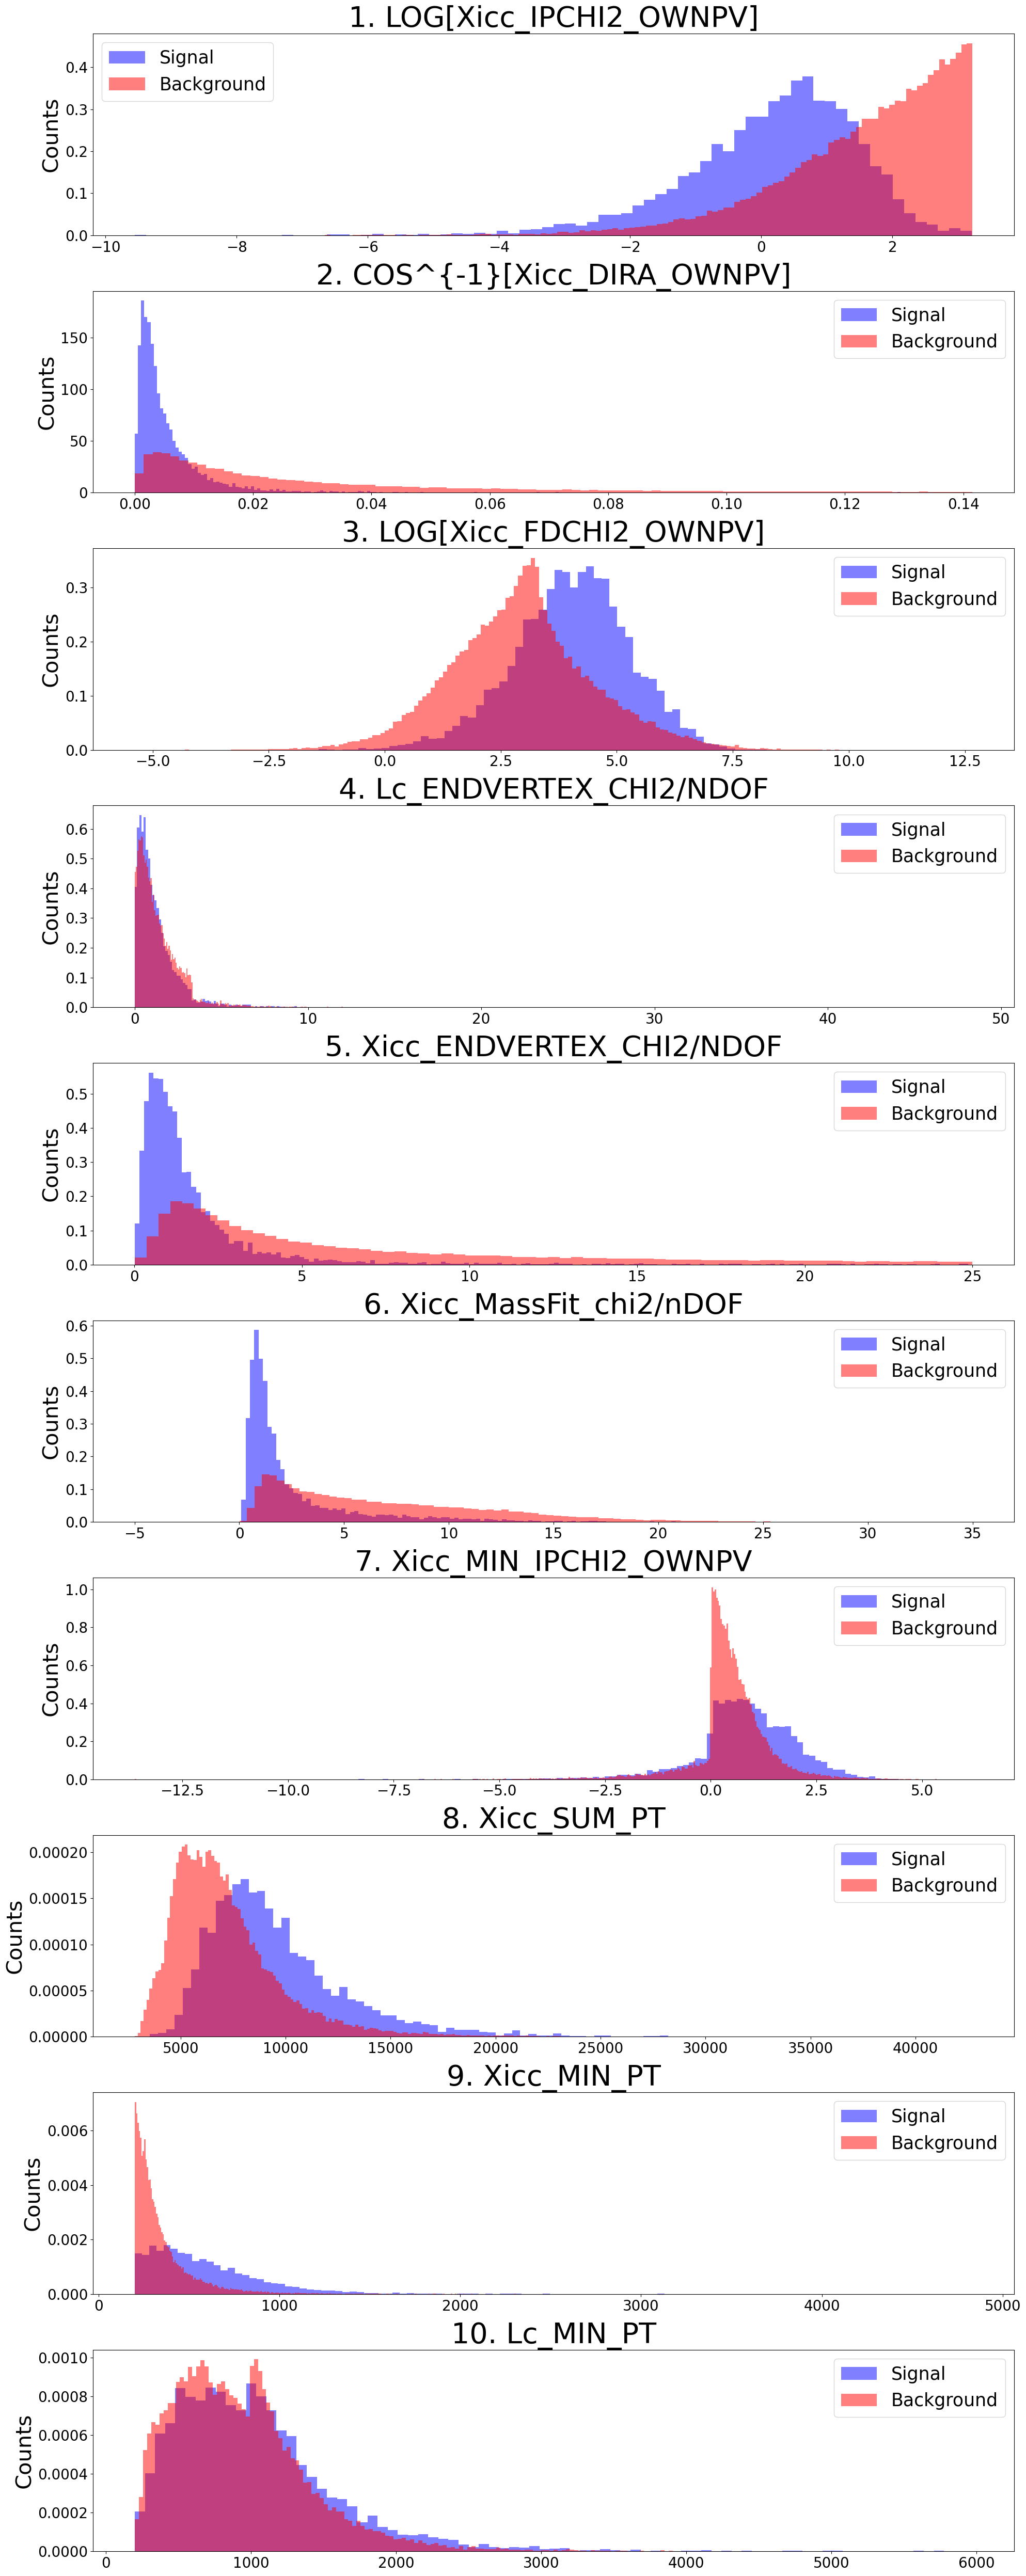

In [5]:
# Plot histograms for each training variable, comparing Signal and Background side by side
fig, axes = plt.subplots(nrows=len(training_variables_Xicc), ncols=1, figsize=(20, 5 * len(training_variables_Xicc)))

for i, variable in enumerate(training_variables_Xicc):
    
    # Plot histogram for the filtered Signal data
    axes[i].hist(df[df['labels'] == 1][variable], bins='fd', color='blue', alpha=0.5, label='Signal', density=True)
    
    # Plot histogram for the filtered Background data
    axes[i].hist(df[df['labels'] == 0][variable], bins='fd', color='red', alpha=0.5, label='Background', density=True)
    
    # Add enumeration to the title
    axes[i].set_title(f'{i+1}. {variable}', fontsize=40)
    axes[i].set_ylabel('Counts', fontsize=30)
    axes[i].legend(fontsize=25)
    axes[i].tick_params(axis='both', which='major', labelsize=20)

plt.tight_layout()
# plt.savefig('/home/bonacci/Results/Training_features_signal_background.pdf')
plt.show()


A Cross-Validation is used in order to use effectively 100% of the data in order decipher the optimal MVA cuts.

Fold 1/5:
Train Indices: [15418 15419 15420 ... 77084 77085 77086]
Test Indices: [    0     1     2 ... 15415 15416 15417]


Fold 2/5:
Train Indices: [    0     1     2 ... 77084 77085 77086]
Test Indices: [15418 15419 15420 ... 30833 30834 30835]


Fold 3/5:
Train Indices: [    0     1     2 ... 77084 77085 77086]
Test Indices: [30836 30837 30838 ... 46250 46251 46252]


Fold 4/5:
Train Indices: [    0     1     2 ... 77084 77085 77086]
Test Indices: [46253 46254 46255 ... 61667 61668 61669]


Fold 5/5:
Train Indices: [    0     1     2 ... 61667 61668 61669]
Test Indices: [61670 61671 61672 ... 77084 77085 77086]




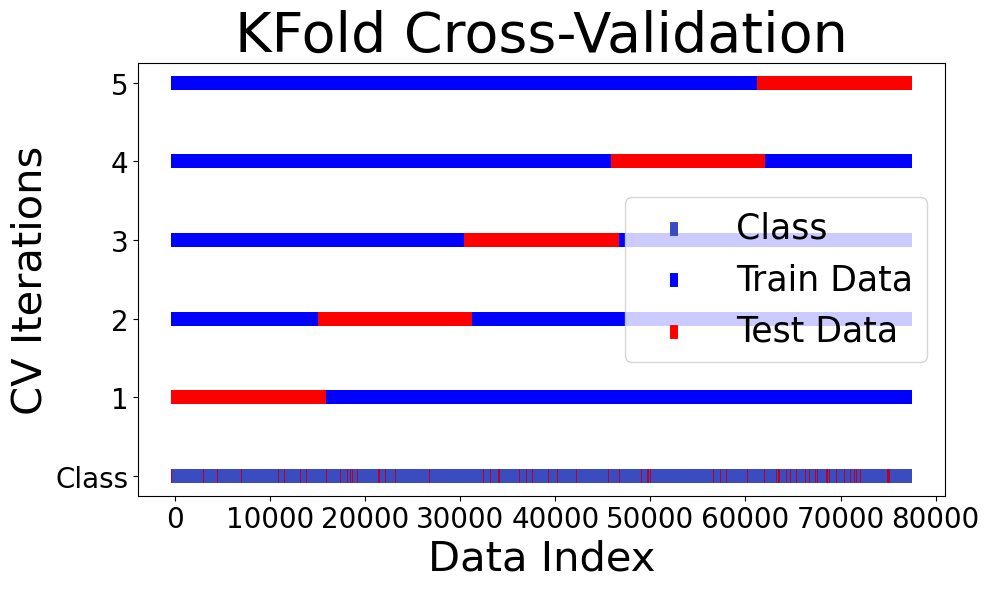

In [11]:
from sklearn.model_selection import KFold

# Initialize KFold with n_splits:
kf = KFold(n_splits=5)

# Get the number of splits (which is 2 in this case)
n_splits = kf.get_n_splits()

# Perform k-fold cross-validation
for fold_num, (train_indices, test_indices) in enumerate(kf.split(df)):
    print(f"Fold {fold_num + 1}/{n_splits}:")

    # Print the indices of the training and test sets for the current fold
    print("Train Indices:", train_indices)
    print("Test Indices:", test_indices)
    print("\n")

def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results for training data (blue)
        ax.scatter(
            [i for i, idx in enumerate(indices) if idx == 0],
            [ii] * np.sum(indices == 0),
            c='blue',
            marker="_",
            lw=lw,
            label='Train Data' if ii == 0 else "",
        )
        
        # Visualize the results for test data (red)
        ax.scatter(
            [i for i, idx in enumerate(indices) if idx == 1],
            [ii] * np.sum(indices == 1),
            c='red',
            marker="_",
            lw=lw,
            label='Test Data' if ii == 0 else "",
        )

X = df[training_variables_Xicc]
y = df['labels']
group = np.arange(len(df))  # Each event is a different row

# Create a scatter plot using the provided function
fig, ax = plt.subplots(figsize=(10, 6))
cmap_cv = plt.get_cmap("coolwarm")

# Plot the classification row at y = -1
ax.scatter(range(len(df)), [-1] * len(df), c=df['labels'], marker="_", cmap=cmap_cv, label='Class', lw=10)

plot_cv_indices(kf, X, y, group, ax, n_splits)

# Set labels and title
ax.set_xlabel('Data Index', fontsize=30)
ax.set_ylabel('CV Iterations', fontsize=30)
ax.set_title('KFold Cross-Validation', fontsize=40)
ax.tick_params(axis='both', which='major', labelsize=20)

# Set y-axis tick locations and labels with the 'Class' label at the bottom
plt.yticks([-1] + list(range(n_splits)), ['Class'] + list(range(1, n_splits + 1)))

# Add legend
ax.legend(fontsize=25, loc = 'center right')

# Show the plot
plt.tight_layout()
plt.savefig('/home/bonacci/Results/KFold_CV.pdf')
plt.show()

In [12]:
# Initialize lists to store training and test data for each fold
X_train = []
Y_train = []
X_test = []
Y_test = []

X = df[training_variables_Xicc + uniform_variables]

Y = df['labels']

for fold_num, (train_indices, test_indices) in enumerate(kf.split(X)):
    x_train = X.iloc[train_indices]
    y_train = Y.iloc[train_indices]

    X_train.append(x_train)
    Y_train.append(y_train)

    x_test = X.iloc[test_indices].copy()
    y_test = Y.iloc[test_indices].copy()

    Y_test.append(y_test)
    X_test.append(x_test)

# For Scaling the data:

def Initialisation(X,Y):
    # "normalise" the data so that it has zero mean and unit variance:
    X_mean, X_std = (np.mean(X, axis=0), np.std(X, axis=0))
    x = (X - X_mean) / X_std
    return (x,Y, X_mean, X_std)

def Scaler(X, Y, X_mean, X_std):
    x = x = (X - X_mean) / X_std
    return(x, Y)


# # Scale Data: (Use the 0 data first)

# (x_train, y_train, x_mean, x_std) = Initialisation(X_train[0], Y_train[0])
# (x_test, y_test) = Scaler(X_test[0], Y_test[0], x_mean, x_std)

#### Preparing Classifer Models:

In [13]:
# Classifier models:

# BDT Models:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import hep_ml
from hep_ml import gradientboosting as ugb
from hep_ml import losses, uboost
from sklearn.tree import DecisionTreeClassifier

def BDT_sklearn_models(n_estimators, X_train, Y_train, training_variables_Xicc, uniform_variables, classifiers):
    # BDT classifiers:
    
    # Adaboost (exp loss) (From sklearn):

    classifiers['AdaBoost - sklearn'] = GradientBoostingClassifier(loss =  'exponential', max_depth = 4, n_estimators = n_estimators, learning_rate = 0.1)

    # # # Random Forest (from sklearn) (Not using):

    # classifiers['Random Forest - sklearn'] = RandomForestClassifier(n_estimators=n_estimators, max_depth=4)

    # # # KNN (from sklearn) (Not using):

    # classifiers['KNN - sklearn'] = KNeighborsClassifier(5, weights = 'distance')

    

    # # KNNAda (exp loss) (from hep_ml):

    knnloss = hep_ml.losses.KnnAdaLossFunction(uniform_variables, knn = 10, uniform_label = 1)

    classifiers['KNN - hep_ml'] = ugb.UGradientBoostingClassifier(loss = knnloss, max_depth = 4, n_estimators = n_estimators,
                                            learning_rate = 0.4, train_features = training_variables_Xicc)

    # KNNFlatness (exp + flat) (from hep_ml):

    knnflatnessloss = hep_ml.losses.KnnFlatnessLossFunction(uniform_variables, fl_coefficient = 3, power = 1.3, uniform_label = 1, n_neighbours=10)

    classifiers['KNNFL - hep_ml'] = ugb.UGradientBoostingClassifier(loss = knnflatnessloss, max_depth = 4,
                                           n_estimators = n_estimators, learning_rate = 0.1,
                                           train_features = training_variables_Xicc)

    # Bin Flatness (from hep_ml):

    flatnessloss = hep_ml.losses.BinFlatnessLossFunction(uniform_variables, fl_coefficient = 3, power = 1.3, uniform_label = 1, n_bins = 100)

    classifiers['FL - hep_ml'] = ugb.UGradientBoostingClassifier(loss = knnflatnessloss, max_depth = 4,
                                           n_estimators = n_estimators, learning_rate = 0.1,
                                           train_features = training_variables_Xicc)
    # # uBoost (from hep_ml) (Not using):

    # base_estimator = DecisionTreeClassifier(max_depth=4)

    # classifiers['uBoost - hep_ml'] = uboost.uBoostClassifier(uniform_features = uniform_variables, uniform_label = 1,
    #                                      base_estimator = base_estimator, n_estimators = n_estimators,
    #                                      train_features = training_variables_Xicc)

        # Training process:

    for name, cls in classifiers.items():
        if name in ['AdaBoost - sklearn', 'Random Forest - sklearn', 'KNN - sklearn']:
            cls.fit(X_train[training_variables_Xicc], Y_train)
        else:
            cls.fit(X_train[training_variables_Xicc+uniform_variables], Y_train)
import torch

def PyTorch_model(epochs, X_train, Y_train, training_variables_Xicc, classifiers):
     # Initialise:
     N, D_in = X_train[training_variables_Xicc].shape
     D_out = 1
     H = 10
     learning_rate = 1e-4
     
     losses = np.empty(epochs)

     x = torch.tensor(X_train[training_variables_Xicc].to_numpy(), dtype=torch.float32)

     y = torch.tensor(Y_train.to_numpy().reshape(-1, 1), dtype=torch.float32)

     # Construct the model.
     model = torch.nn.Sequential(
     torch.nn.Linear(D_in, H),
     torch.nn.Sigmoid(),
     torch.nn.Linear(H, D_out),
     torch.nn.Sigmoid()  
     )

     loss_fn = torch.nn.BCELoss(reduction='sum')

     for t in range(epochs):
          # Forward pass.
          y_pred = model(x)

                    
          # Compute loss.
          loss = loss_fn(y_pred, y)

          if t % 100 == 99:
               print(t, loss.item())
          losses[t] = loss.item()

          # Zero the gradients before running the backward pass.
          model.zero_grad()

          # Backward pass.
          loss.backward()

          # Update the weights using gradient descent.
          with torch.no_grad():
               for param in model.parameters():
                    param -= learning_rate * param.grad
          
          weights = param

     classifiers['NN - PyTorch'] = model

     return (losses)
import numpy as np

def PyTorch_FL_model(epochs, x_train, y_train, training_variables_Xicc, uniform_variables, classifiers):
    # Initialize
    N, D_in = x_train[training_variables_Xicc].shape
    D_out = 1
    H = 10
    # epochs = 10000
    learning_rate = 1e-4
    losses = np.empty(epochs)
    bin_min = x_train[y_train == 1][uniform_variables].to_numpy().min()
    bin_max = x_train[y_train == 1][uniform_variables].to_numpy().max()

    x = torch.tensor(x_train[training_variables_Xicc].to_numpy(), dtype=torch.float32)

    x_sig_uni = torch.tensor(x_train[y_train == 1][uniform_variables].to_numpy(), dtype=torch.float32)

    x_uni = torch.tensor(x_train[uniform_variables].to_numpy(), dtype=torch.float32)

    y = torch.tensor(y_train.to_numpy().reshape(-1, 1), dtype=torch.float32)

    model = torch.nn.Sequential(
        torch.nn.Linear(D_in, H),
        torch.nn.Sigmoid(),
        torch.nn.Linear(H, H),
        torch.nn.Sigmoid(),
        # torch.nn.Linear(H, H),
        # torch.nn.Sigmoid(),
        torch.nn.Linear(H, D_out),
        torch.nn.Sigmoid()
    )

    # Loss functions:

    loss_fn = torch.nn.BCELoss(reduction='sum')

    loss_uni = torch.nn.MSELoss(reduction='mean')

    losses = []
    loss1_list = []
    loss2_list = []

    uniform_vals_pred_list = []
    uniform_vals_list = []

    # Training loop
    for t in range(epochs):
        y_pred = model(x)
        loss1 = loss_fn(y_pred, y)
        
        # Create Mask
        mask = (y_pred > 0.7).detach().numpy().ravel()
        
        # Create Binned data using numpy.histogram instead of plt.hist
        uniform_vals_pred, _ = np.histogram(x_uni[mask], bins=100, range=(bin_min, bin_max))
        uniform_vals, _ = np.histogram(x_sig_uni.numpy(), bins=100, range=(bin_min, bin_max))
        
        uniform_vals_pred_list.append(uniform_vals_pred)
        uniform_vals_list.append(uniform_vals)

        # Convert binned data to tensors for loss computation
        uniform_vals_pred_tensor = torch.tensor(uniform_vals_pred, dtype=torch.float32)
        uniform_vals_tensor = torch.tensor(uniform_vals, dtype=torch.float32)
        
        loss2 = loss_uni(uniform_vals_pred_tensor, uniform_vals_tensor)
        
        loss1_list.append(loss1.item())
        loss2_list.append(loss2.item())
        
        loss = loss1 + loss2
        losses.append(loss.item())
        
        if t % 100 == 99:
            print(t, loss.item())
        
        model.zero_grad()
        loss.backward()
        
        with torch.no_grad():
            for param in model.parameters():
                param -= learning_rate * param.grad

    classifiers['NN_FL - PyTorch'] = model

    return (losses, loss1_list, loss2_list)

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

# Prepare Classifiers:
n_estimators = 100
n_epochs = 10000

# Classifiers for each n_split:
classifier_list = []
losses_1_list = []
losses_2_list = []

for (x_train, y_train, x_test, y_test) in zip(X_train, Y_train, X_test, Y_train):
    # Prepares training/testing data for classifiers:
    (x_train, y_train, x_mean, x_std) = Initialisation(x_train, y_train)
    (x_test, y_test) = Scaler(x_test, y_test, x_mean, x_std)

    # Classifier for each n_split:
    classifiers = {}

    # Train the classifiers:
    BDT_sklearn_models(n_estimators, x_train, y_train, training_variables_Xicc, uniform_variables, classifiers);
    (losses_1) = PyTorch_model(n_epochs, x_train, y_train, training_variables_Xicc, classifiers);
    (losses_2, _, _) = PyTorch_FL_model(n_epochs, x_train, y_train, training_variables_Xicc, uniform_variables, classifiers);

    # Save the classifiers for each n_split:
    classifier_list.append(classifiers)

    # Calculate NN losses for each PyTorch model:
    losses_1_list.append(losses_1)
    losses_2_list.append(losses_2)

/home/bonacci/Work/miniconda3/envs/Env/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(
/home/bonacci/Work/miniconda3/envs/Env/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(
/home/bonacci/Work/miniconda3/envs/Env/lib/python3.8/site-packages/hep_ml/losses.py:711: UserWarning: 4377 events out of all bins 
  warnings.warn("%i events out of all bins " % numpy.sum(out_of_bins), UserWarning)
/home/bonacci/Work/miniconda3/envs/Env/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(
/home/bonacci/Work/miniconda3/envs/Env/lib/python3.8/site-packages/hep_ml/losses.py:711: UserWarning: 4377 events out of all bins 
  warnings.warn("%i events out of all bins " % numpy.sum(out_of_bins), User

99 7524.193359375
199 7202.8916015625
299 7007.953125
399 6872.0048828125
499 6776.56884765625
599 6703.5537109375
699 6646.1044921875
799 6600.30615234375
899 6562.8046875
999 6531.392578125
1099 6504.7216796875
1199 6481.89697265625
1299 6462.1767578125
1399 6444.908203125
1499 6429.5439453125
1599 6415.63720703125
1699 6402.833984375
1799 6390.87158203125
1899 6379.5634765625
1999 6368.78125
2099 6358.4287109375
2199 6348.4267578125
2299 6338.70361328125
2399 6329.2021484375
2499 6319.876953125
2599 6310.705078125
2699 6301.6826171875
2799 6292.82421875
2899 6284.16015625
2999 6275.7255859375
3099 6267.556640625
3199 6259.6806640625
3299 6252.10546875
3399 6244.79931640625
3499 6237.6396484375
3599 6230.2861328125
3699 6221.982421875
3799 6211.9580078125
3899 6200.962890625
3999 6190.548828125
4099 6181.09326171875
4199 6172.4365234375
4299 6164.5126953125
4399 6157.2998046875
4499 6150.7294921875
4599 6144.6953125
4699 6139.08984375
4799 6133.826171875
4899 6128.85302734375
4999 61

/home/bonacci/Work/miniconda3/envs/Env/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(
/home/bonacci/Work/miniconda3/envs/Env/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(
/home/bonacci/Work/miniconda3/envs/Env/lib/python3.8/site-packages/hep_ml/losses.py:711: UserWarning: 4385 events out of all bins 
  warnings.warn("%i events out of all bins " % numpy.sum(out_of_bins), UserWarning)
/home/bonacci/Work/miniconda3/envs/Env/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(
/home/bonacci/Work/miniconda3/envs/Env/lib/python3.8/site-packages/hep_ml/losses.py:711: UserWarning: 4385 events out of all bins 
  warnings.warn("%i events out of all bins " % numpy.sum(out_of_bins), User

99 7429.09423828125
199 7155.255859375
299 6965.876953125
399 6843.5498046875
499 6761.24462890625
599 6701.33837890625
699 6655.9599609375
799 6620.583984375
899 6592.28125
999 6568.8388671875
1099 6548.7744140625
1199 6531.2158203125
1299 6515.607421875
1399 6501.52197265625
1499 6488.599609375
1599 6476.52978515625
1699 6465.0859375
1799 6454.13330078125
1899 6443.556640625
1999 6433.2177734375
2099 6422.982421875
2199 6412.7373046875
2299 6402.45361328125
2399 6392.27783203125
2499 6382.439453125
2599 6373.0654296875
2699 6364.197265625
2799 6355.89013671875
2899 6348.171875
2999 6340.97802734375
3099 6334.216796875
3199 6327.82080078125
3299 6321.74951171875
3399 6315.96923828125
3499 6310.443359375
3599 6305.11376953125
3699 6299.919921875
3799 6294.81396484375
3899 6289.83056640625
3999 6285.16064453125
4099 6280.87109375
4199 6276.9013671875
4299 6273.1796875
4399 6269.64599609375
4499 6266.2548828125
4599 6262.9765625
4699 6259.794921875
4799 6256.697265625
4899 6253.674316406

/home/bonacci/Work/miniconda3/envs/Env/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(
/home/bonacci/Work/miniconda3/envs/Env/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(
/home/bonacci/Work/miniconda3/envs/Env/lib/python3.8/site-packages/hep_ml/losses.py:711: UserWarning: 4413 events out of all bins 
  warnings.warn("%i events out of all bins " % numpy.sum(out_of_bins), UserWarning)
/home/bonacci/Work/miniconda3/envs/Env/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(
/home/bonacci/Work/miniconda3/envs/Env/lib/python3.8/site-packages/hep_ml/losses.py:711: UserWarning: 4413 events out of all bins 
  warnings.warn("%i events out of all bins " % numpy.sum(out_of_bins), User

99 7666.13330078125
199 7336.46484375
299 7123.0625
399 6962.60595703125
499 6855.72119140625
599 6775.19384765625
699 6712.56640625
799 6664.20556640625
899 6626.42919921875
999 6596.138671875
1099 6571.24072265625
1199 6550.3037109375
1299 6532.15234375
1399 6515.87548828125
1499 6501.0126953125
1599 6487.263671875
1699 6474.345703125
1799 6462.0791015625
1899 6450.4033203125
1999 6439.30859375
2099 6428.78125
2199 6418.7978515625
2299 6409.33056640625
2399 6400.3515625
2499 6391.8271484375
2599 6383.720703125
2699 6375.994140625
2799 6368.61279296875
2899 6361.5439453125
2999 6354.7646484375
3099 6348.25146484375
3199 6341.98681640625
3299 6335.953125
3399 6330.13427734375
3499 6324.5146484375
3599 6319.080078125
3699 6313.81787109375
3799 6308.7138671875
3899 6303.755859375
3999 6298.9296875
4099 6294.2255859375
4199 6289.63671875
4299 6285.158203125
4399 6280.787109375
4499 6276.5234375
4599 6272.3671875
4699 6268.3203125
4799 6264.38818359375
4899 6260.5791015625
4999 6256.903320

/home/bonacci/Work/miniconda3/envs/Env/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(
/home/bonacci/Work/miniconda3/envs/Env/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(
/home/bonacci/Work/miniconda3/envs/Env/lib/python3.8/site-packages/hep_ml/losses.py:711: UserWarning: 4406 events out of all bins 
  warnings.warn("%i events out of all bins " % numpy.sum(out_of_bins), UserWarning)
/home/bonacci/Work/miniconda3/envs/Env/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(
/home/bonacci/Work/miniconda3/envs/Env/lib/python3.8/site-packages/hep_ml/losses.py:711: UserWarning: 4406 events out of all bins 
  warnings.warn("%i events out of all bins " % numpy.sum(out_of_bins), User

99 7713.8017578125
199 7445.259765625
299 7331.2822265625
399 7189.1123046875
499 7029.70361328125
599 6928.658203125
699 6861.88818359375
799 6813.2900390625
899 6776.3671875
999 6747.22216796875
1099 6723.2392578125
1199 6702.685546875
1299 6684.2939453125
1399 6666.9638671875
1499 6649.529296875
1599 6630.84765625
1699 6610.8095703125
1799 6590.40185546875
1899 6570.306640625
1999 6550.87890625
2099 6532.244140625
2199 6514.4609375
2299 6497.6591796875
2399 6482.0146484375
2499 6467.6689453125
2599 6454.66748046875
2699 6442.96044921875
2799 6432.4296875
2899 6422.9140625
2999 6414.248046875
3099 6406.2744140625
3199 6398.86083984375
3299 6391.9013671875
3399 6385.3173828125
3499 6379.04296875
3599 6373.50390625
3699 6396.5146484375
3799 6386.7744140625
3899 6376.1611328125
3999 6368.19287109375
4099 6359.1572265625
4199 6350.37646484375
4299 6342.0625
4399 6334.38525390625
4499 6327.4052734375
4599 6321.076171875
4699 6315.36669921875
4799 6310.2548828125
4899 6305.7001953125
4999 

/home/bonacci/Work/miniconda3/envs/Env/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(
/home/bonacci/Work/miniconda3/envs/Env/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(
/home/bonacci/Work/miniconda3/envs/Env/lib/python3.8/site-packages/hep_ml/losses.py:711: UserWarning: 4369 events out of all bins 
  warnings.warn("%i events out of all bins " % numpy.sum(out_of_bins), UserWarning)
/home/bonacci/Work/miniconda3/envs/Env/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(
/home/bonacci/Work/miniconda3/envs/Env/lib/python3.8/site-packages/hep_ml/losses.py:711: UserWarning: 4369 events out of all bins 
  warnings.warn("%i events out of all bins " % numpy.sum(out_of_bins), User

99 7654.31689453125
199 7286.021484375
299 7111.0390625
399 6977.6279296875
499 6871.77685546875
599 6787.8515625
699 6723.0361328125
799 6674.0859375
899 6637.21484375
999 6608.9521484375
1099 6586.5029296875
1199 6567.68798828125
1299 6550.9990234375
1399 6535.8759765625
1499 6522.3955078125
1599 6510.55810546875
1699 6500.14453125
1799 6490.85693359375
1899 6482.41015625
1999 6474.5458984375
2099 6467.03857421875
2199 6459.6923828125
2299 6452.353515625
2399 6444.923828125
2499 6437.37890625
2599 6429.77490234375
2699 6422.22265625
2799 6414.8349609375
2899 6407.68115234375
2999 6400.796875
3099 6394.19384765625
3199 6387.880859375
3299 6381.8525390625
3399 6376.0927734375
3499 6370.580078125
3599 6365.2880859375
3699 6360.18896484375
3799 6355.259765625
3899 6350.4814453125
3999 6345.841796875
4099 6341.330078125
4199 6336.9345703125
4299 6332.6416015625
4399 6328.43798828125
4499 6324.3046875
4599 6320.220703125
4699 6316.16796875
4799 6312.12451171875
4899 6308.08154296875
4999 6

<Figure size 1000x800 with 0 Axes>

In [10]:
(x_train, y_train, x_mean, x_std) = Initialisation(X, Y)
(x_test, y_test) = Scaler(x_test, y_test, x_mean, x_std)
# Classifier for each n_split:
classifiers = {}

# Train the classifiers:
BDT_sklearn_models(n_estimators, x_train, y_train, training_variables_Xicc, uniform_variables, classifiers);
(losses_1) = PyTorch_model(n_epochs, x_train, y_train, training_variables_Xicc, classifiers);
(losses_2, _, _) = PyTorch_FL_model(n_epochs, x_train, y_train, training_variables_Xicc, uniform_variables, classifiers);

/home/bonacci/Work/miniconda3/envs/Env/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(
/home/bonacci/Work/miniconda3/envs/Env/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(
/home/bonacci/Work/miniconda3/envs/Env/lib/python3.8/site-packages/hep_ml/losses.py:711: UserWarning: 5714 events out of all bins 
  warnings.warn("%i events out of all bins " % numpy.sum(out_of_bins), UserWarning)
/home/bonacci/Work/miniconda3/envs/Env/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(
/home/bonacci/Work/miniconda3/envs/Env/lib/python3.8/site-packages/hep_ml/losses.py:711: UserWarning: 5714 events out of all bins 
  warnings.warn("%i events out of all bins " % numpy.sum(out_of_bins), User

99 9342.19140625
199 9016.607421875
299 8774.0712890625
399 8592.220703125
499 8474.6103515625
599 8394.3212890625
699 8335.8974609375
799 8290.251953125
899 8254.650390625
999 8226.45703125
1099 8203.5478515625
1199 8184.52294921875
1299 8168.37646484375
1399 8154.36328125
1499 8141.896484375
1599 8130.53564453125
1699 8120.0888671875
1799 8110.5498046875
1899 8101.8818359375
1999 8093.9697265625
2099 8086.67724609375
2199 8079.87939453125
2299 8073.466796875
2399 8067.345703125
2499 8061.43408203125
2599 8055.66015625
2699 8049.9384765625
2799 8044.154296875
2899 8038.13037109375
2999 8031.64208984375
3099 8024.71435546875
3199 8017.78955078125
3299 8011.25927734375
3399 8005.1943359375
3499 7999.52490234375
3599 7994.18701171875
3699 7989.1318359375
3799 7984.31640625
3899 7979.69921875
3999 7975.2333984375
4099 7970.86474609375
4199 7966.5185546875
4299 7962.09619140625
4399 8001.69677734375
4499 8025.5576171875
4599 8014.97119140625
4699 8012.2607421875
4799 8010.7392578125
4899 8

In [11]:
import pickle

# Save the Models:
with open('classifiers_dict_2.pkl', 'wb') as f:
    pickle.dump(classifiers, f)

with open('classifier_list_2.pkl', 'wb') as f:
    pickle.dump(classifier_list, f)

#Stop


In [14]:
import pickle

# Loading the pickled File:

with open('classifier_list.pkl', 'rb') as f:
    classifier_list = pickle.load(f)


AdaBoost - sklearn: 0.9653651576079907
NN - PyTorch: 0.964781424309249


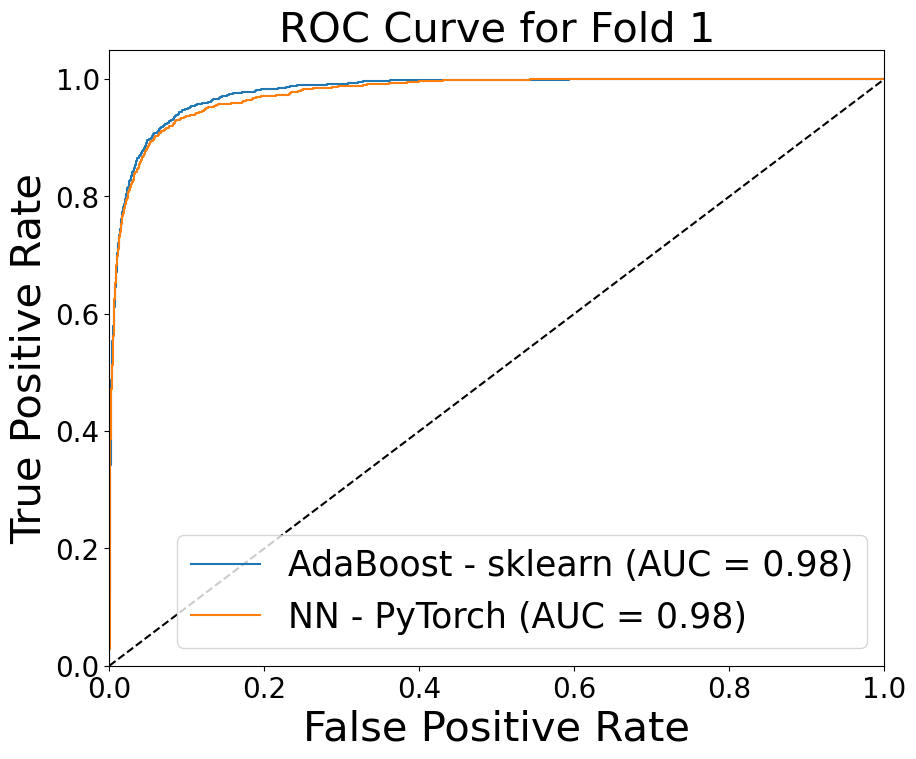

AdaBoost - sklearn: 0.9638085354780127
NN - PyTorch: 0.9635490984563497


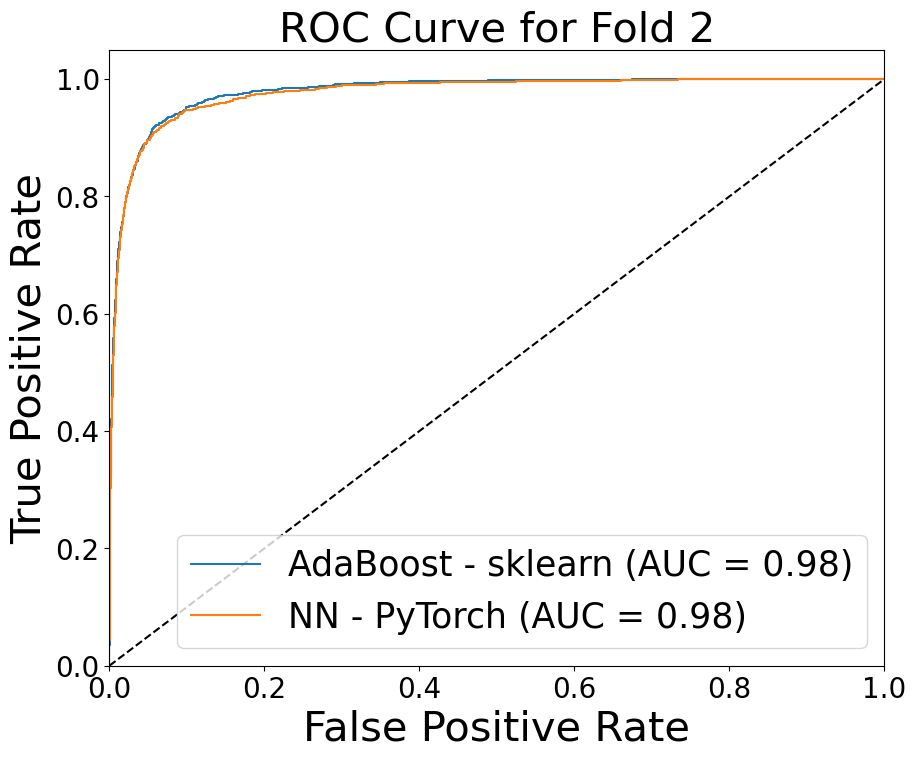

AdaBoost - sklearn: 0.9632872802750211
NN - PyTorch: 0.9630278264253745


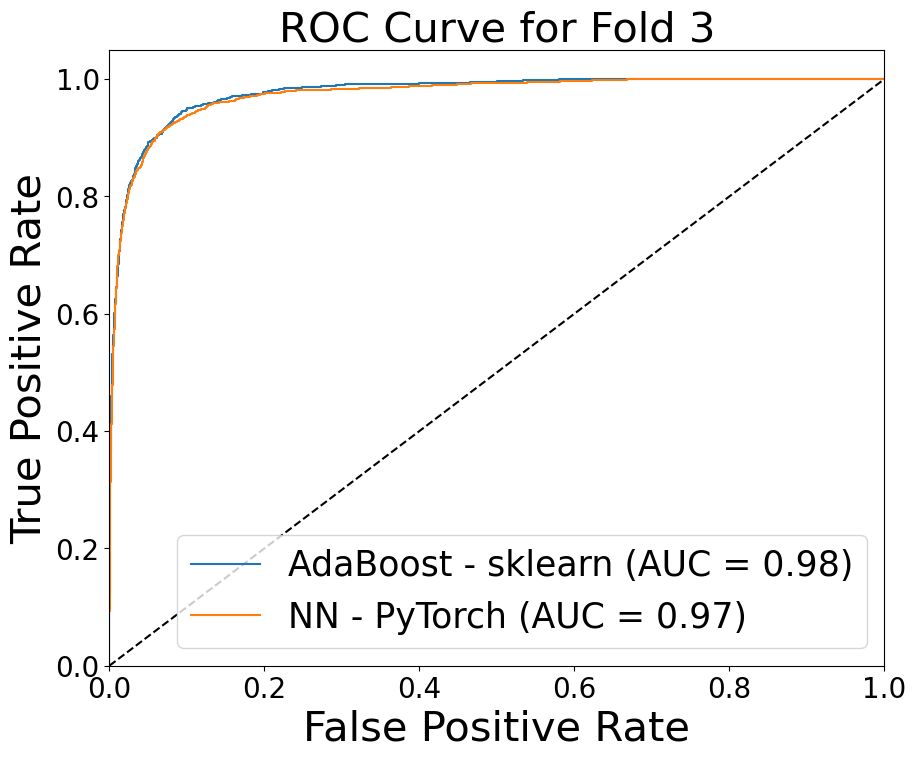

AdaBoost - sklearn: 0.964325095673607
NN - PyTorch: 0.9637413245119024


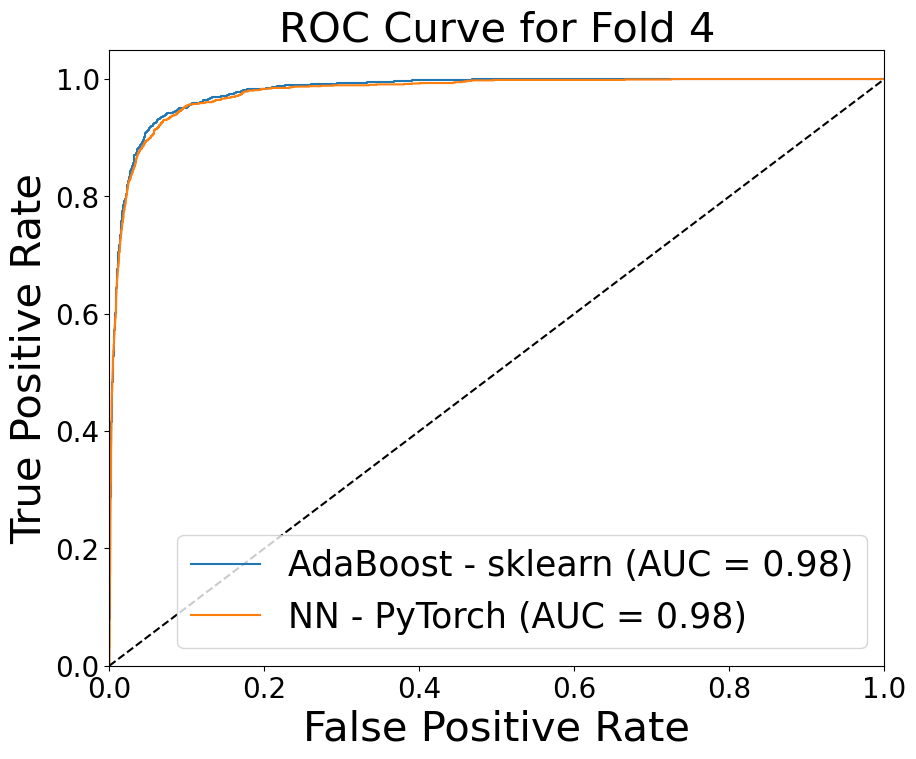

AdaBoost - sklearn: 0.9641305052863722
NN - PyTorch: 0.9628332360381398


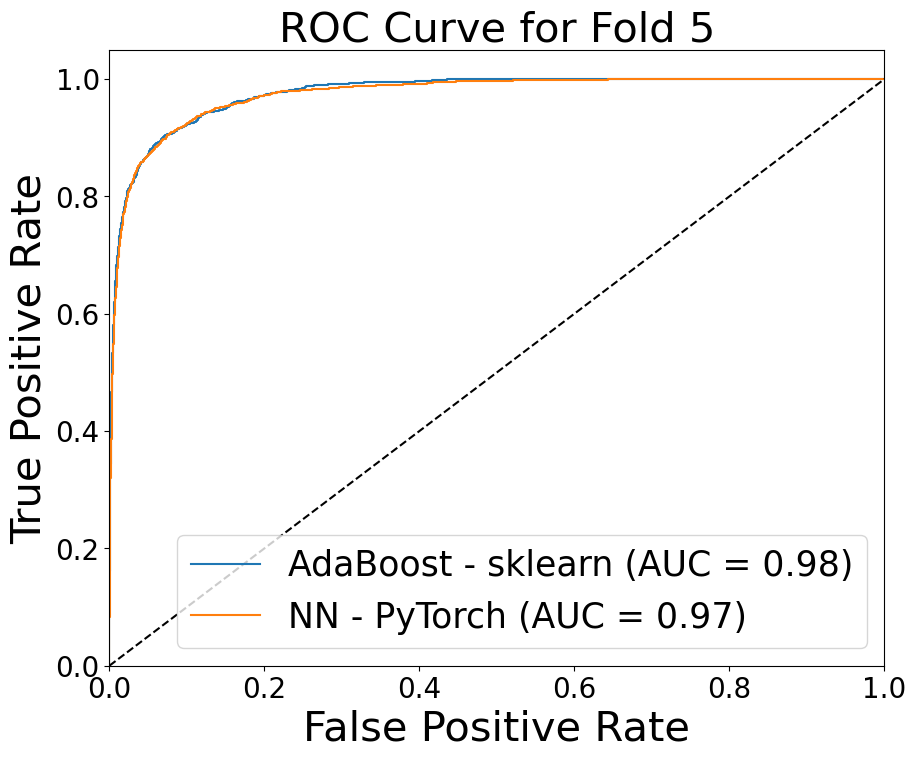

In [46]:
# Collect classification probabilities:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

for i, (x_train, y_train, x_test, y_test, classifiers) in enumerate(zip(X_train, Y_train, X_test, Y_test, classifier_list)):
    # Prepares training/testing data for classifiers:
    (x_train, y_train, x_mean, x_std) = Initialisation(x_train, y_train)
    (x_test, y_test) = Scaler(x_test, y_test, x_mean, x_std)    

    plt.figure(figsize=(10, 8))
    for name, clf in classifiers.items():
        if name not in ['NN - PyTorch', 'AdaBoost - sklearn']:
            continue  # Skip classifiers not in the list
        
        if name == 'NN - PyTorch':
            x_test_torch = torch.tensor(x_test[training_variables_Xicc].to_numpy(), dtype=torch.float32)
            Y_proba = clf(x_test_torch).detach().numpy()
            Y_pred = (Y_proba > 0.5).astype(int)
        
        elif name == 'AdaBoost - sklearn':
            Y_pred = clf.predict(x_test[training_variables_Xicc])
            Y_proba = clf.predict_proba(x_test[training_variables_Xicc])[:, 1]  # Assuming binary classification and you want the proba for class 1
        
        acc = accuracy_score(y_test, Y_pred)  # Assuming Y_test is your ground truth labels for the test set
        print('{}:'.format(name), acc)

        # Add predictions to DataFrame:
        X_test[i][f"{name}"] = Y_proba

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, Y_proba)  # Assuming Y_test is your ground truth labels for the test set
        roc_auc = auc(fpr, tpr)
        
        # Plot the ROC curve
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    # Plot settings
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=30)
    plt.ylabel('True Positive Rate', fontsize=30)
    plt.title('ROC Curve for Fold {}'.format(i+1), fontsize=30)

    plt.legend(loc="lower right", fontsize = 25)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.savefig('/home/bonacci/Results/ROC_Curve_nsplits_{}.pdf'.format(i+1))
   
    plt.show()


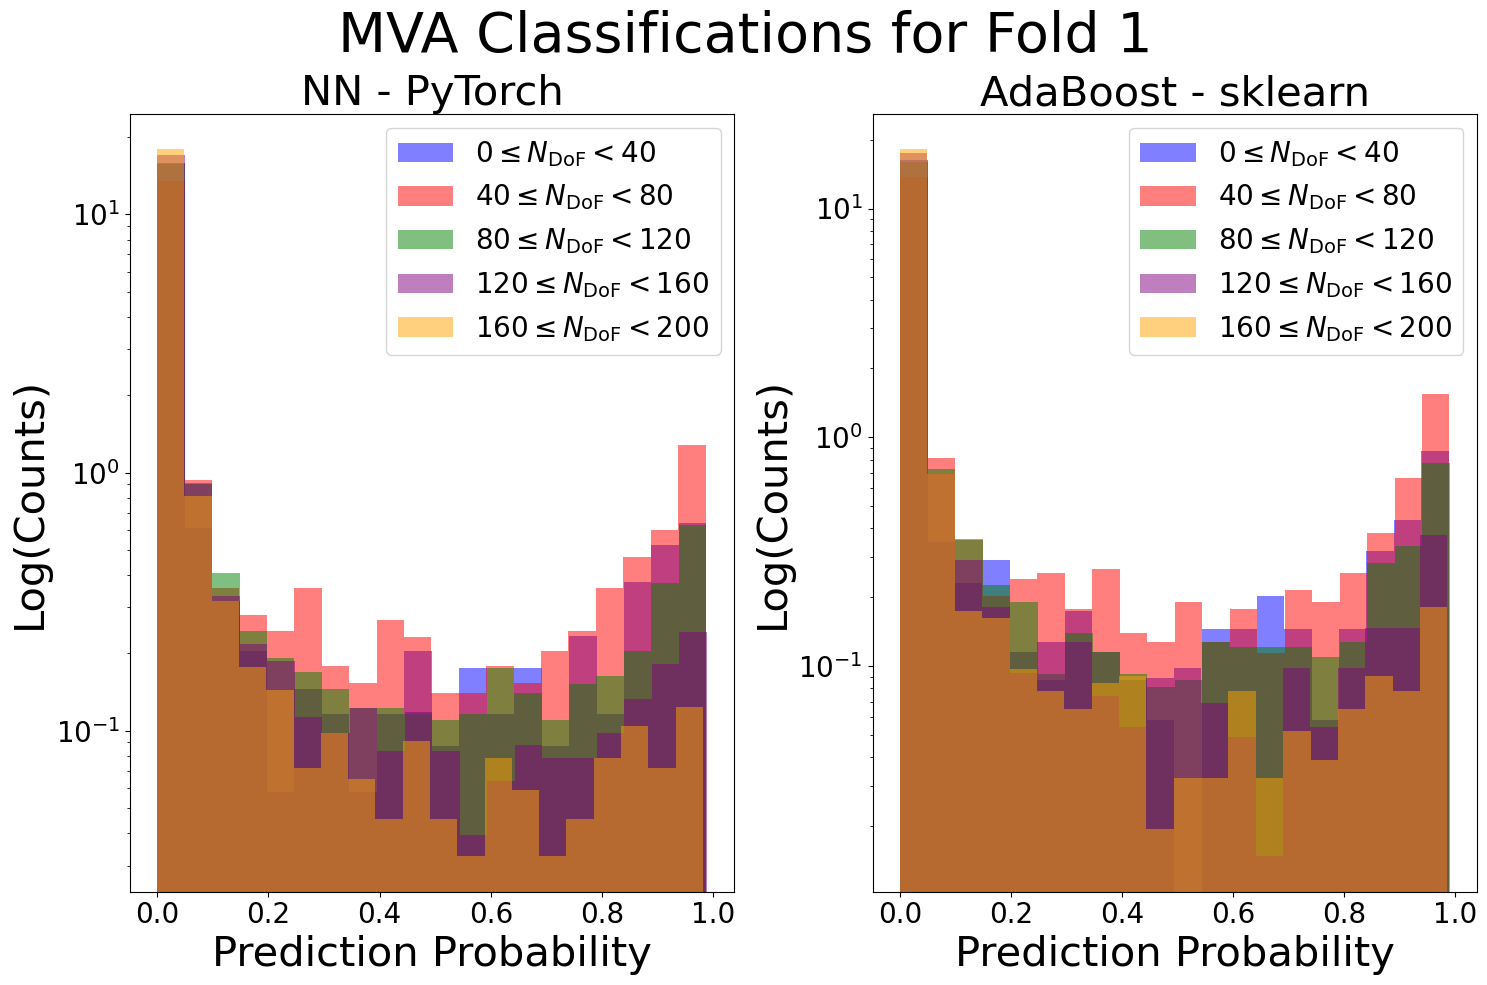

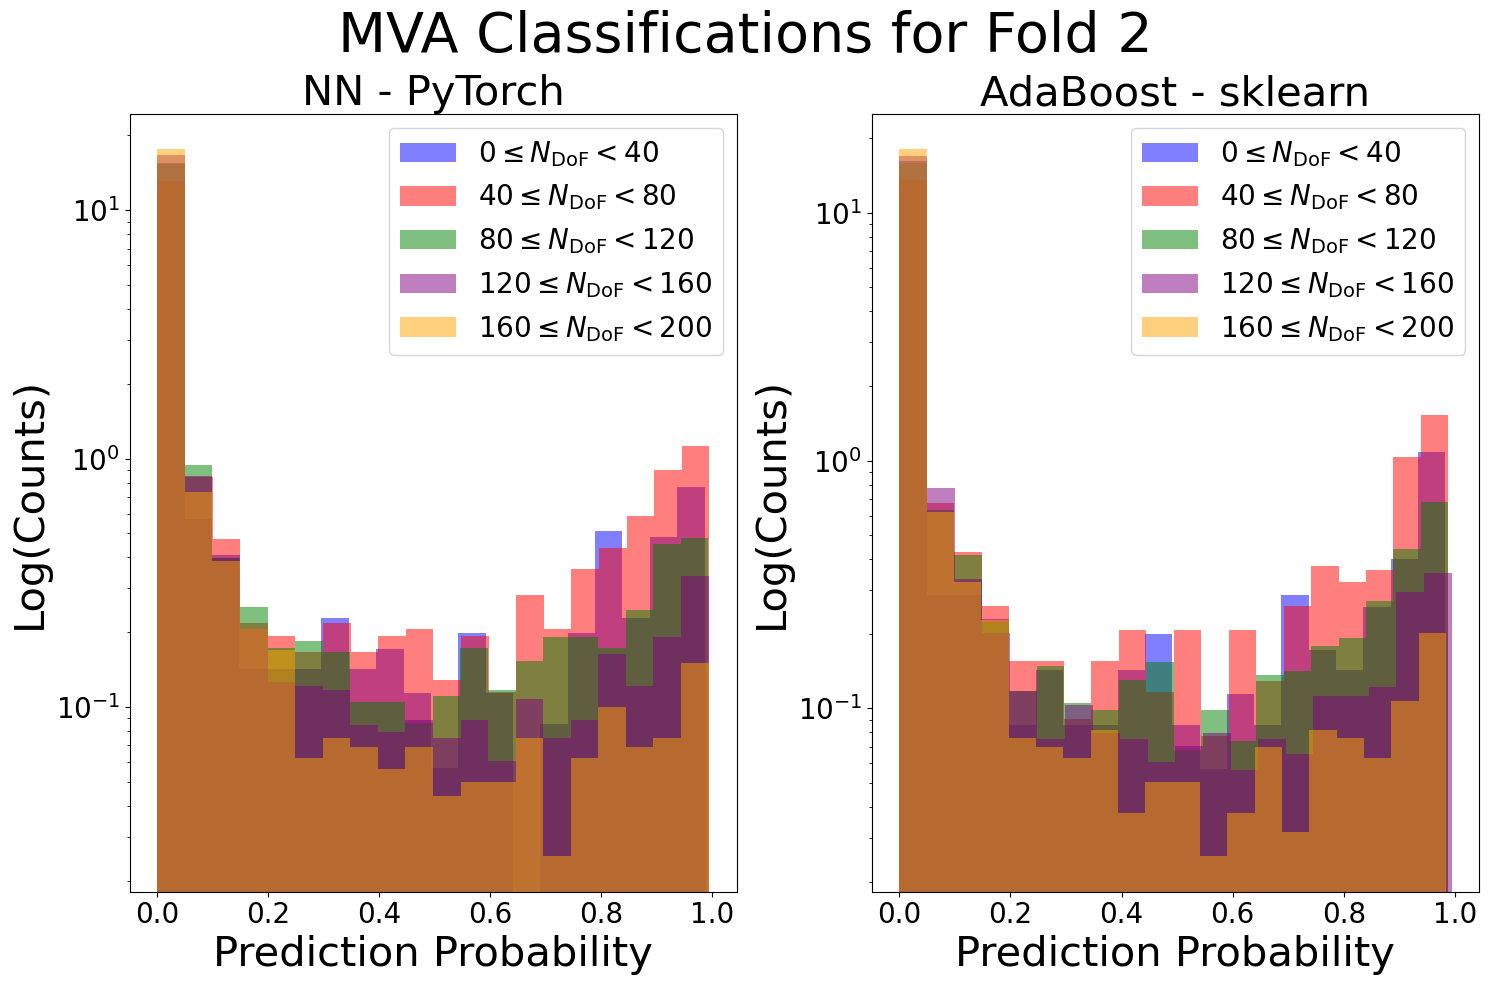

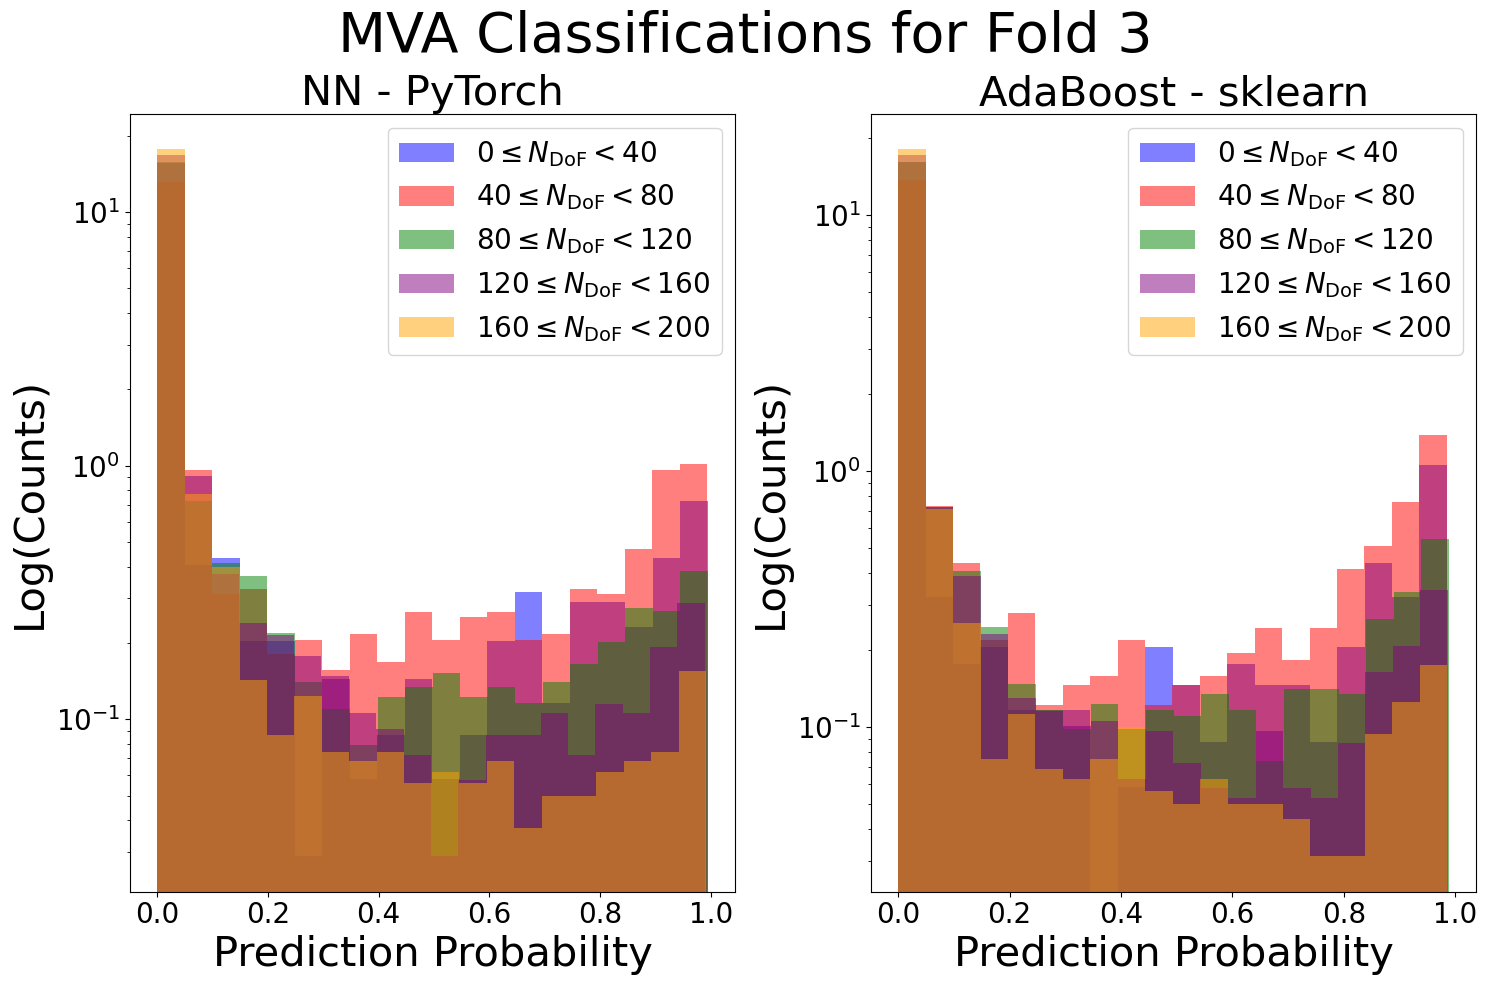

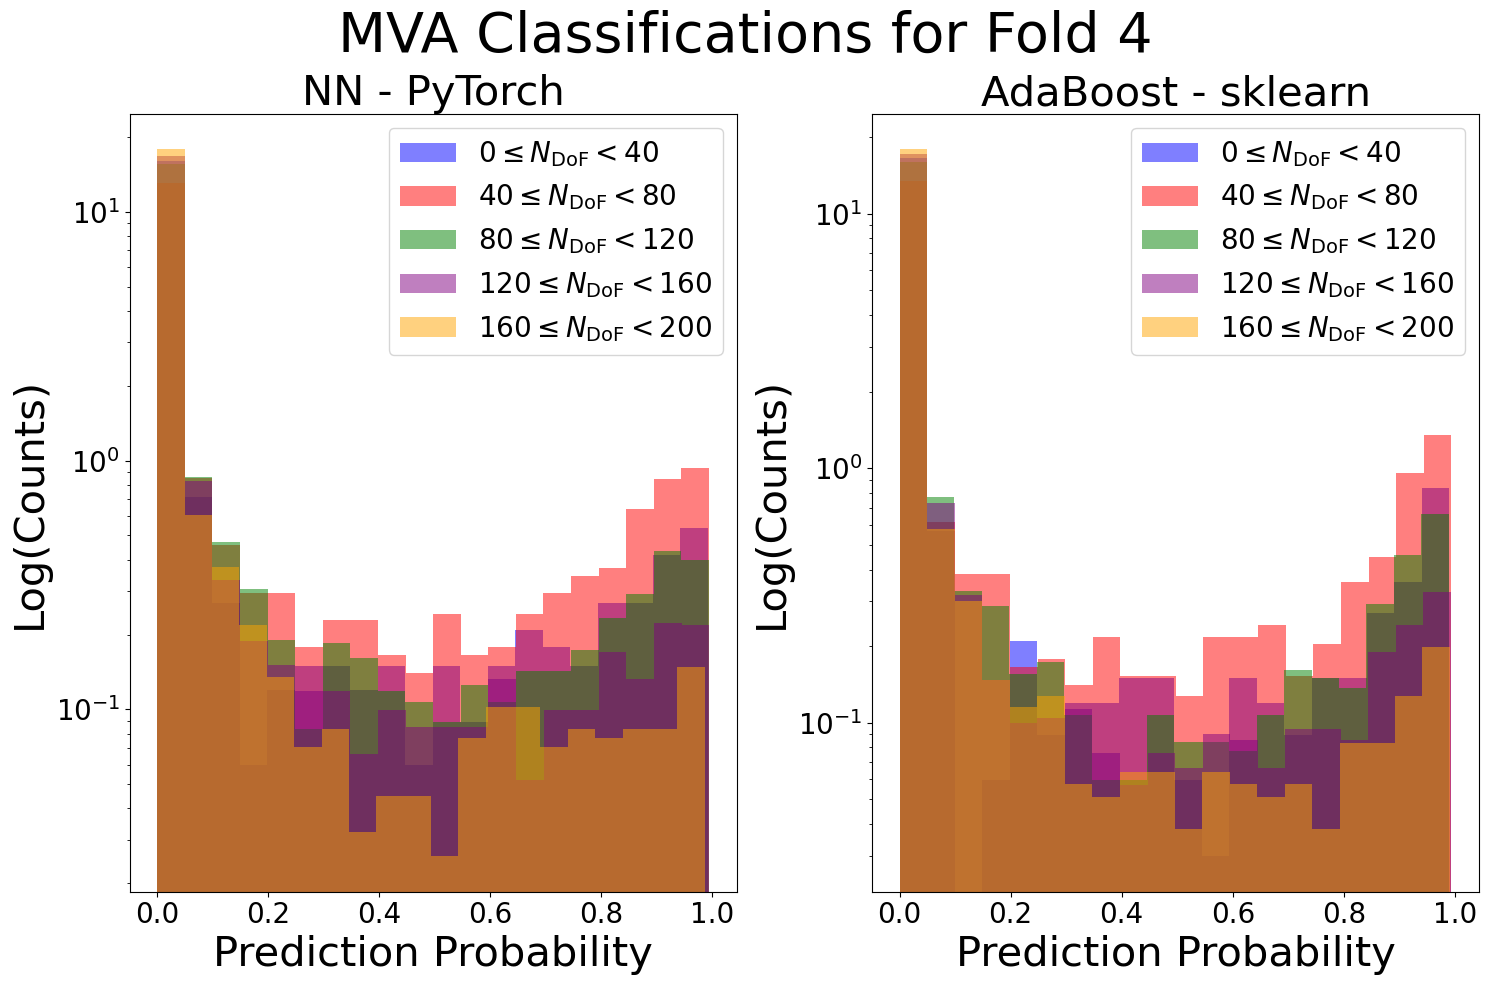

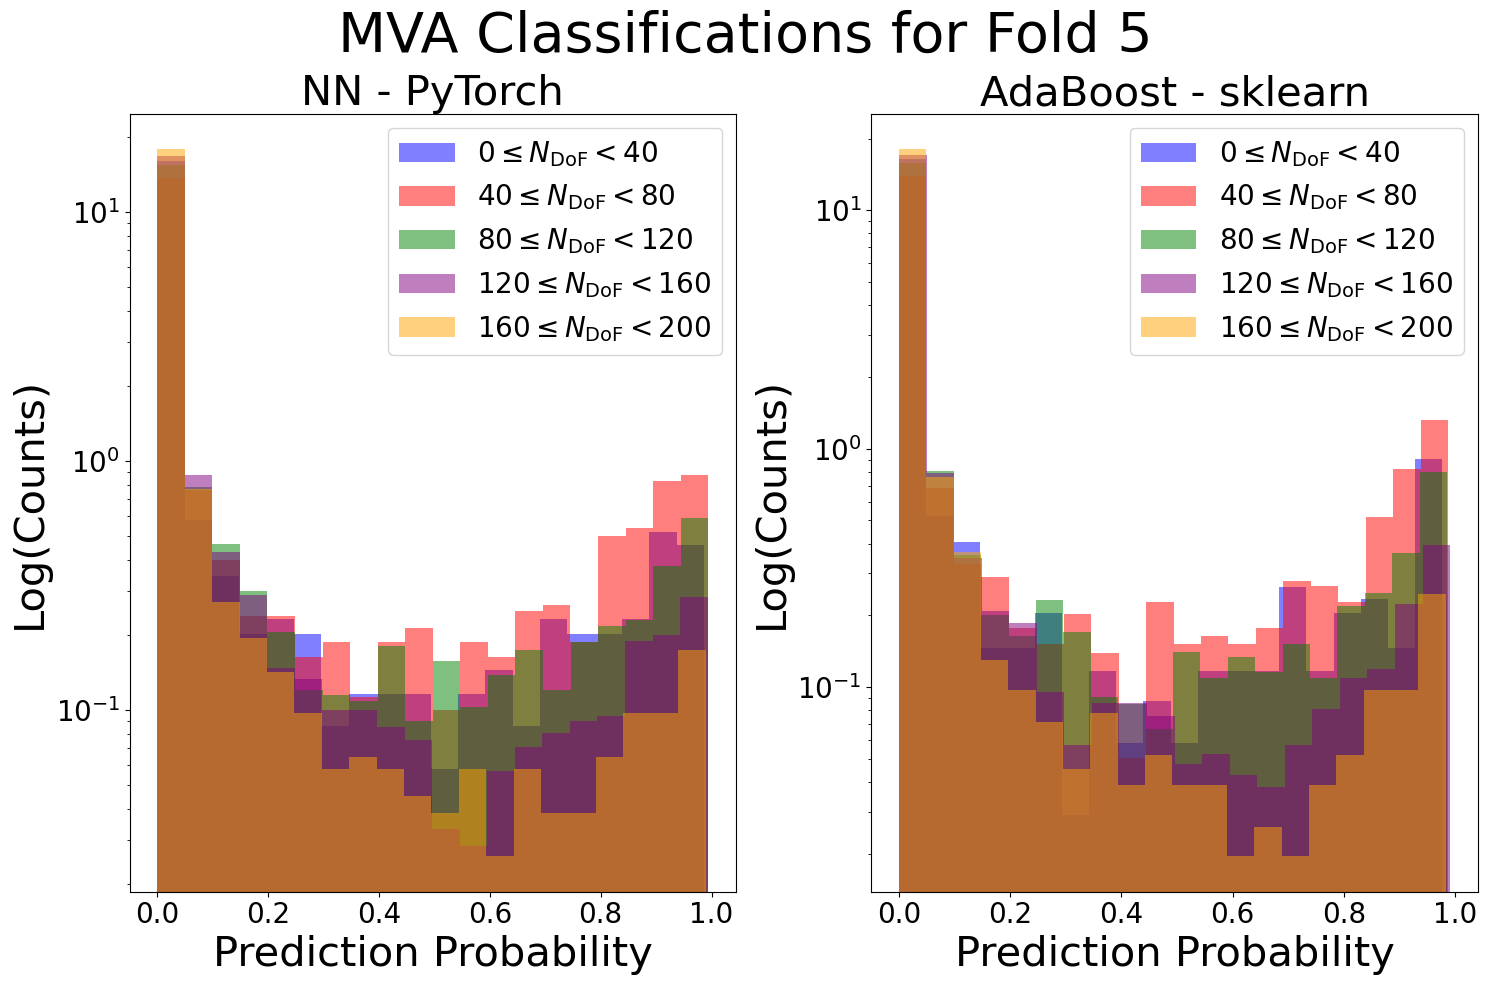

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

def Unnormalize(X_normalized, X_mean, X_std):
    """Reverts the normalization to get the original values."""
    X_original = X_normalized * X_std + X_mean
    return X_original

# Define the bins for degrees of freedom as before
bins = [(0, 40), (40, 80), (80, 120), (120, 160), (160, 200)]
colors = ['blue', 'red', 'green', 'purple', 'orange']
classifiers_to_plot = ['NN - PyTorch', 'AdaBoost - sklearn']

for i, (x_train, y_train, x_test, y_test, classifiers) in enumerate(zip(X_train, Y_train, X_test, Y_test, classifier_list)):
    # Prepares training/testing data for classifiers:
    (x_train, y_train, x_mean, x_std) = Initialisation(x_train, y_train)
    (x_test, y_test) = Scaler(x_test, y_test, x_mean, x_std)    

    fig, axes = plt.subplots(nrows=1, ncols=len(classifiers_to_plot), figsize=(15, 10))

    for j, name in enumerate(classifiers_to_plot):
        clf = classifiers[name]

        if name == 'NN - PyTorch':
            x_test_torch = torch.tensor(x_test[training_variables_Xicc].to_numpy(), dtype=torch.float32)
            Y_proba = clf(x_test_torch).detach().numpy()
        
        elif name == 'AdaBoost - sklearn':
            Y_proba = clf.predict_proba(x_test[training_variables_Xicc])[:, 1]  # Assuming binary classification and you want the proba for class 1
        
        # Unnormalize the test data
        x_test_original = Unnormalize(x_test, x_mean, x_std)
        
        # Add predictions to DataFrame:
        X_test[i][f"{name}"] = Y_proba


        x_test_original['Y_proba'] = Y_proba

        for idx, (bin_start, bin_end) in enumerate(bins):
            mask = (x_test_original['Xicc_OWNPV_NDOF'] >= bin_start) & (x_test_original['Xicc_OWNPV_NDOF'] < bin_end)
            axes[j].hist(x_test_original[mask]['Y_proba'], bins=20, alpha=0.5, label=f"${bin_start} \leq N_{{\mathrm{{DoF}}}} < {bin_end}$", color=colors[idx], log=True, density=True)
            axes[j].set_title(name, fontsize = 30)
            axes[j].set_xlabel('Prediction Probability', fontsize = 30)
            axes[j].set_ylabel('Log(Counts)', fontsize = 30)
            axes[j].legend(fontsize = 20)
            axes[j].tick_params(axis='both', which='major', labelsize=20)

    plt.suptitle(f'MVA Classifications for Fold {i+1}', fontsize=40)
    plt.tight_layout()
    plt.savefig(f'/home/bonacci/Results/MVA_Classifications_Fold_{i+1}.pdf')  # Save the figure
    plt.show()


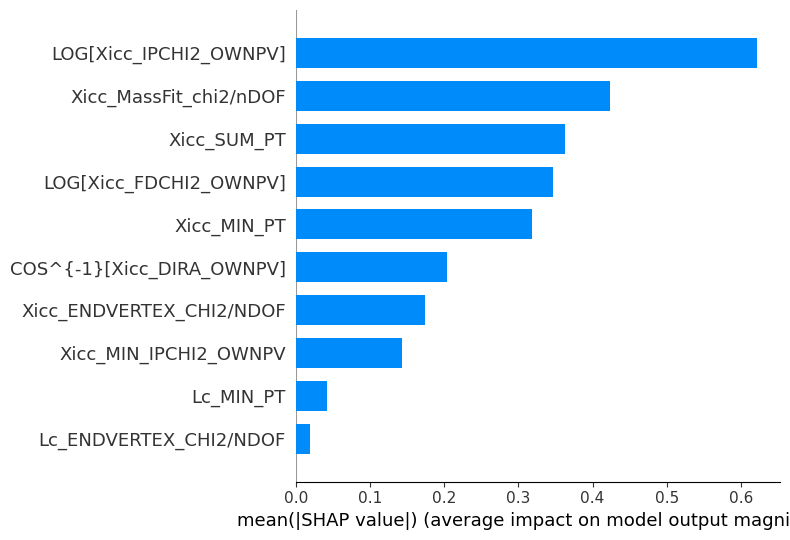

In [26]:
import shap

# Assuming classifier_list[0]['AdaBoost - sklearn'] is your trained AdaBoost model
explainer = shap.TreeExplainer(classifier_list[0]['AdaBoost - sklearn'])
shap_values = explainer.shap_values(x_test[training_variables_Xicc][0:1000])

# Plot summary plot
shap.summary_plot(shap_values, x_test[training_variables_Xicc][0:1000], plot_type='bar', feature_names=training_variables_Xicc)


Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


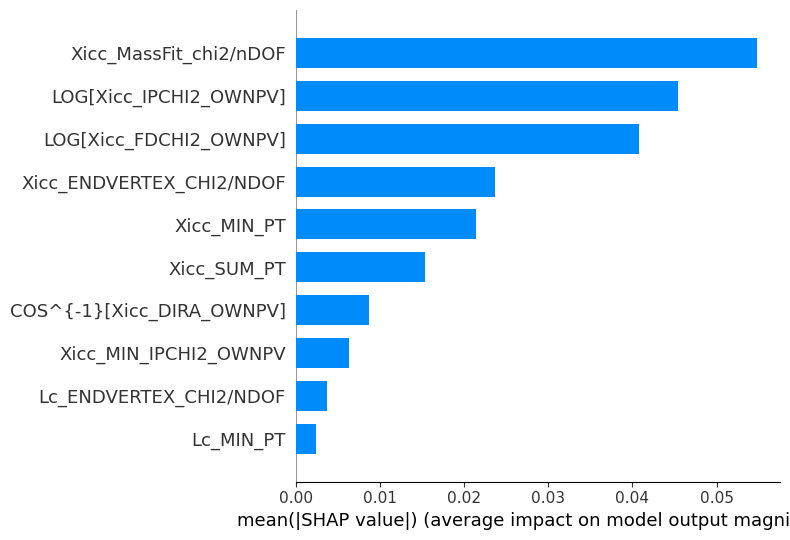

In [27]:
import shap

x_test_torch = torch.tensor(x_test[training_variables_Xicc].to_numpy(), dtype=torch.float32)


explainer = shap.DeepExplainer(classifier_list[0]['NN - PyTorch'], x_test_torch[0:1000]) 
shap_values = explainer.shap_values(x_test_torch[0:1000])
shap.initjs()  # Required for Jupyter notebook
shap.summary_plot(shap_values, x_test_torch[0:1000], plot_type='bar', feature_names=training_variables_Xicc)

#### Do Lc fit

In [47]:
# Used Modules:

import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from iminuit import cost, Minuit
from numba_stats import truncnorm, truncexpon, crystalball_ex

In [48]:
# Extract the mass values for signal and background
s = df_Signal_Lc['Lc_M'].to_numpy()
b = df_Background_Lc['Lc_M'].to_numpy()

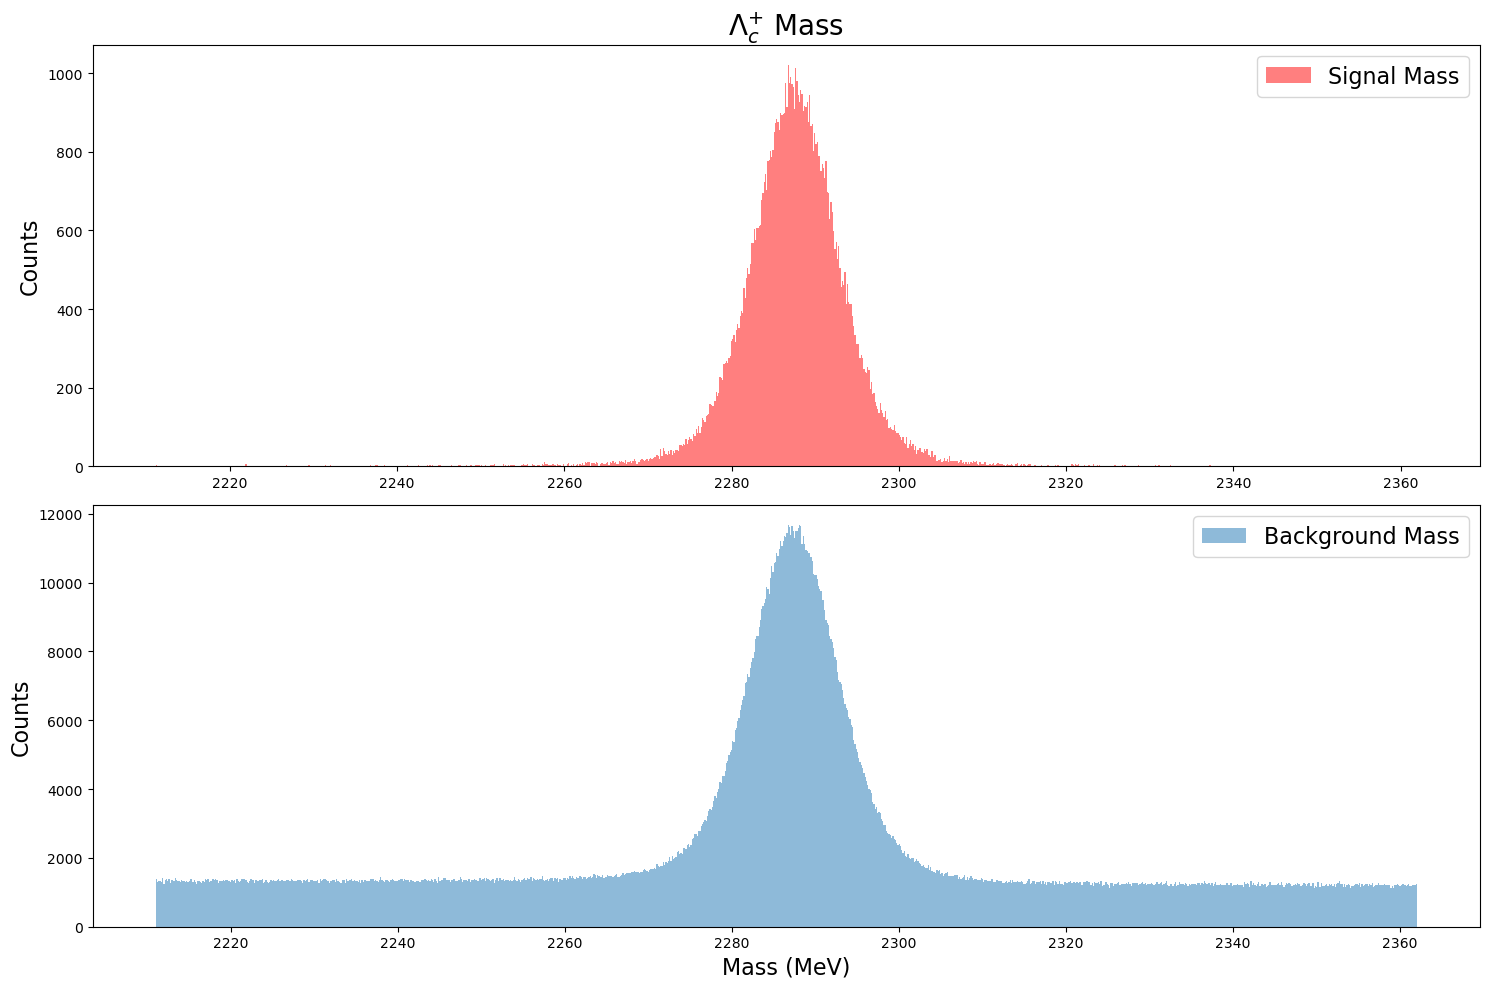

In [49]:
# Signal and Background Lc Mass Histogram:

fig, axs = plt.subplots(nrows=2, figsize=(15, 10))

# Plotting:
axs[0].hist(s, bins=1000, alpha=0.5, color = 'red', label= 'Signal Mass')
axs[1].hist(b, bins=1000, alpha=0.5, label= 'Background Mass')

# Setting labels, titles, and legend:
axs[0].set_title('$\Lambda_{c}^{+}$ Mass', fontsize=20)
axs[0].legend(fontsize=16)
axs[0].set_ylabel('Counts', fontsize=16)
axs[1].set_xlabel('Mass (MeV)', fontsize=16)
axs[1].set_ylabel('Counts', fontsize=16)
axs[1].legend(fontsize=16)

# Save and Show:
plt.tight_layout()
plt.savefig('/home/bonacci/Results/Lc_Mass_plot_train.pdf')
plt.show()

In [50]:
# Producing Extended Unbinned Fit and Save:

# Range of fitting:
xr = (2240, 2340)

# Fix Signal and Background to only have values between the range of fitting
s = s[(xr[0] < s) & (s < xr[1])]
b = b[(xr[0] < b) & (b < xr[1])]

pts = np.append(s, b) # Signal and Background are combined into pts

# pts = pts[:1000]

# Gaussian for signal and Exponential for background:
def density(x, s, b, mu, sigma, tau):
    return s + b, (s * truncnorm.pdf(x, *xr, mu + xr[0], sigma) +
        b * truncexpon.pdf(x, *xr, xr[0], tau))

c = cost.ExtendedUnbinnedNLL(pts, density)

m = Minuit(c, s = len(s), b = len(b), mu = pts.mean(), sigma = 6, tau = 400)
m.limits["s", "b", "sigma", "tau"] = (0, None)
m.limits["mu"] = (0, xr[1] - xr[0])
m.migrad()
# m.interactive()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -3.527e+07                 │              Nfcn = 380              │
│ EDM = 3.18e-05 (Goal: 0.0002)    │           time = 85.7 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s     │ 1.0029e6  │ 0.0012e6  │            │            │    0    │         │       │
│ 1 │ b     │  903.6e3  │   1.2e3   │            │            │    0    │         │       │
│ 2 │ mu    │  47.418   │   0.007   │            │            │    0    │   100   │       │
│ 3 │ sigma │   5.685   │   0.007   │            │            │    0    │         │       │
│ 4 │ tau   │    823    │    25     │            │            │    0    │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────┐
│       │         s         b        mu     sigma       tau │
├───────┼───────────────────────────────────────────────────┤
│     s │  1.48e+06    -0.5e6  45.54e-3   2.78263     0.6e3 │
│     b │    -0.5e6  1.37e+06 267.80e-3  -2.68848    -0.9e3 │
│    mu │  45.54e-3 267.80e-3   5.2e-05        -0 -21.89e-3 │
│ sigma │   2.78263  -2.68848        -0  4.62e-05   4.42e-3 │
│   tau │     0.6e3    -0.9e3 -21.89e-3   4.42e-3       612 │
└───────┴───────────────────────────────────────────────────┘

In [51]:
# Taking the fit parameters:

best_fit_values = m.values

Signal_integral = best_fit_values['s']

Background_integral = best_fit_values['b']

mu = best_fit_values['mu']

sigma = best_fit_values['sigma']

tau = best_fit_values['tau']

In [54]:
Signal_integral

1002946.4209824326

In [55]:
# Approximately how many Xicc events we have:

Ratio = 2.22 * 10**(-4)

Ratio_err = .56 * 10**(-4)

# Xicc events:
signal_number = Signal_integral * Ratio 

# Lc (background) events:
background_number = 186309-signal_number

In [56]:
signal_number

222.65410545810005

In [57]:
background_number

186086.3458945419

#### Do FoM:

The signal efficiency is defined as such:

\begin{equation}
\varepsilon(t)=\frac{\text { Number of signal events after the response cut } t}{\text { Number of signal events generated }},
\end{equation}

, where t is the response cut/ threshold cut.

The background efficiency is defined as such:

\begin{equation}
B(t)=\frac{\text { Number of background events after the response cut } t}{C_{\text {scaling }} \times C_{\text {mode }} \times C_{\text {window }}},
\end{equation}

, where t is the response cut/threshold cut.

From Poisson statistics, the standard deviation ($\sigma$)is denoted by the square root of the number of events ($\sqrt{\lambda}$):

\begin{equation}
\sigma = \sqrt{\lambda}.
\end{equation}

In the context of detecting a signal, the total number of events is the number of signal events (S), plus the the number of background events (B). Hence, the standard deviation is $\sqrt{S+B}$.

To determine the significance of a signal, we must comapre the size of the signal (S), to the uncertainty of the total count ($\sigma$). Hence the Signicance or Figure of Merit (FoM) is:

\begin{equation}
FoM = \frac{S}{\sqrt{S+B}}.
\end{equation}

\begin{equation}
\epsilon_S=\frac{\text { Number of True Signal Events Correctly Identified }}{\text { Total Number of True Signal Events }}
\end{equation}

B(t) should correspond to the expected background underneath the signal region, rescaling is in order. S(t) should correpond to the number of signal events too, this must also be rescaled.

In [74]:
# Calculate FoM function:

import numpy as np

def calculate_FoM(x_test, y_test, name, signal_number, background_number, num_points=1000):
    thresholds = np.linspace(0, 1, num_points)

    signal_efficiencies = []
    signal_events_list = []

    background_efficiencies = []
    background_events_list = []

    for threshold in thresholds:
        # Calculate Signal Events:
        total_signal = len(x_test[y_test==1])
        selected_signal = len(x_test[(y_test==1) & (x_test[name] > threshold)])
        signal_efficiency = selected_signal / total_signal
        signal_efficiencies.append(signal_efficiency)
        signal_events = signal_number * signal_efficiency
        signal_events_list.append(signal_events)

        # Calculate Background Events:
        total_background = len(x_test[y_test==0])
        selected_background = len(x_test[(y_test==0) & (x_test[name] > threshold)])
        background_efficiency = selected_background / total_background
        background_efficiencies.append(background_efficiency)
        background_events = background_number * background_efficiency
        background_events_list.append(background_events)

    signal_efficiencies = np.array(signal_efficiencies)
    signal_events_list = np.array(signal_events_list)
    background_efficiencies = np.array(background_efficiencies)
    background_events_list = np.array(background_events_list)
    fom_original = signal_events_list / np.sqrt(signal_events_list + background_events_list)

    return thresholds, signal_efficiencies, signal_events_list, background_efficiencies, background_events_list, fom_original


In [59]:
X_test[2]

,LOG[Xicc_IPCHI2_OWNPV],COS^{-1}[Xicc_DIRA_OWNPV],LOG[Xicc_FDCHI2_OWNPV],Lc_ENDVERTEX_CHI2/NDOF,Xicc_ENDVERTEX_CHI2/NDOF,Xicc_MassFit_chi2/nDOF,Xicc_MIN_IPCHI2_OWNPV,Xicc_SUM_PT,Xicc_MIN_PT,Lc_MIN_PT,Xicc_OWNPV_NDOF,AdaBoost - sklearn,NN - PyTorch
30836,0.016421,0.073931,0.147742,1.690453,2.264256,5.464000,0.200096,5198.506962,211.006545,775.792908,9.0,0.000210,0.000044
30837,1.466227,0.015186,4.457491,4.509715,1.868408,2.773630,1.265554,11403.179619,953.053988,991.326173,27.0,0.870837,0.909774
30838,0.501607,0.015176,2.329107,3.908128,5.134564,21.022093,0.967715,10566.210629,384.424650,1427.498475,111.0,0.004274,0.008395
30839,-0.003940,0.030659,0.865096,0.599156,0.481085,0.465313,-3.055553,5575.784632,236.714213,645.832369,105.0,0.006606,0.012575
30840,1.159370,0.002526,6.931415,0.966146,1.404354,2.107545,3.298071,13315.636002,522.809526,1048.311282,35.0,0.662765,0.519743
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46248,-1.212147,0.005360,0.858034,0.169391,3.821953,2.771561,-1.329831,7216.880449,315.590338,1315.860590,131.0,0.015226,0.011083
46249,2.527726,0.009745,3.769060,1.285706,2.619876,2.427199,0.281165,10760.223634,203.665043,1518.489829,111.0,0.002927,0.003214
46250,2.988854,0.064050,3.333149,0.029362,6.817562,5.729715,0.175605,4967.298193,274.958849,285.178227,183.0,0.000027,0.000007
46251,3.089717,0.007829,4.629619,2.689046,1.399135,1.772747,0.743190,6694.242818,219.584150,893.623051,217.0,0.006653,0.007339


invalid value encountered in divide


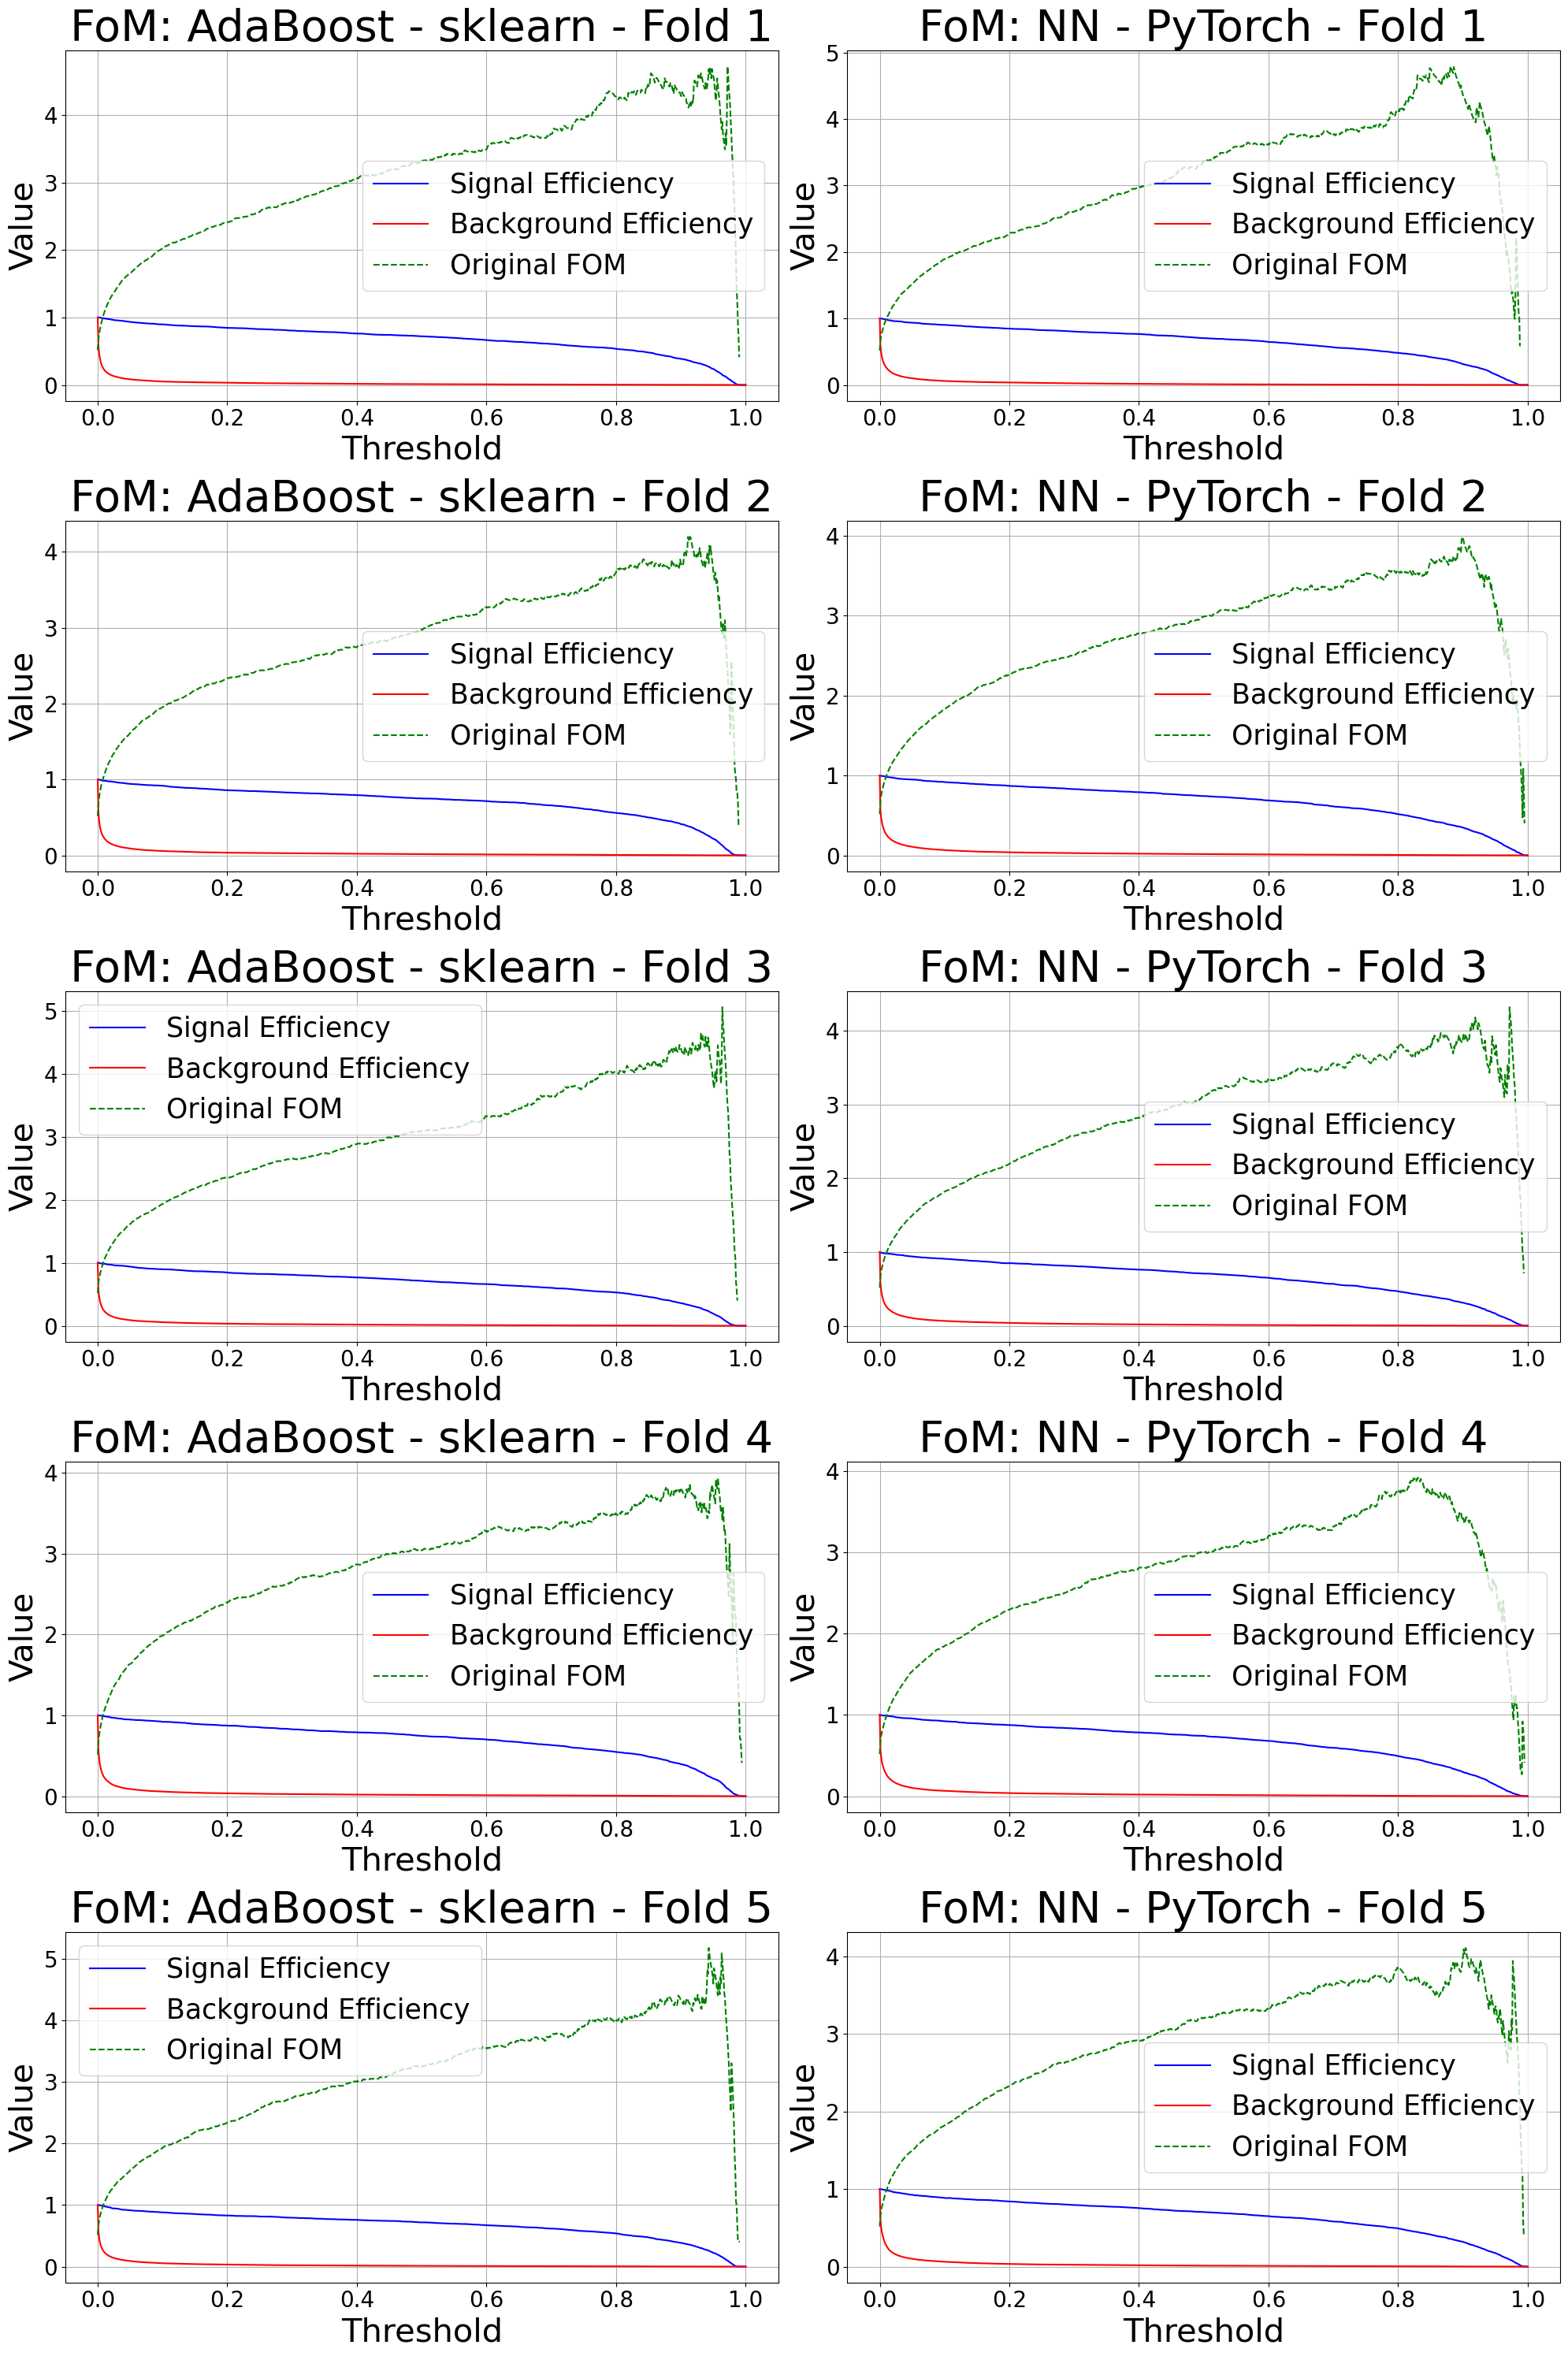

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming n_splits is defined somewhere in your code
n_splits = len(X_test)  # Number of K-folds

# Number of classifiers:
n_classifiers = 2

fig, axs = plt.subplots(n_splits, n_classifiers, figsize=(20, 30))

# Initialize a matrix to store FoM values
fom_matrix = []
sig_matrix = []

classifier_list = ['AdaBoost - sklearn', 'NN - PyTorch']

for i, classifier_name in enumerate(classifier_list):
    fom_row = [] 
    sig_row = []

    for j, (x, y) in enumerate(zip(X_test, Y_test)):
        thresholds, signal_eff, signal_events, background_eff, background_events, fom = calculate_FoM(x, y, classifier_name, signal_number, background_number)

        fom_row.append(fom)
        sig_row.append(signal_eff)
        
        # Plot Signal Efficiency
        axs[j, i].plot(thresholds, signal_eff, label='Signal Efficiency', color='blue')

        # Plot Background Efficiency
        axs[j, i].plot(thresholds, background_eff, label='Background Efficiency', color='red')

        # Plot Original FOM
        axs[j, i].plot(thresholds, fom, label='Original FOM', color='green', linestyle='--')

        # Add x and y labels
        axs[j, i].set_xlabel('Threshold', fontsize = 30)
        axs[j, i].set_ylabel('Value', fontsize = 30)

        # Add title
        axs[j, i].set_title(f'FoM: {classifier_name} - Fold {j+1}', fontsize = 40)
        
        # Add grid and legend
        axs[j, i].grid(True)
        axs[j, i].legend(fontsize = 25)
        axs[j, i].tick_params(axis='both', which='major', labelsize=20)

    fom_matrix.append(fom_row)
    sig_matrix.append(sig_row)


# Convert the matrix to a numpy array for easier manipulation
fom_matrix = np.array(fom_matrix) # n_splits is rows, n_classifier is columns
sig_matrix = np.array(sig_matrix)

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.savefig('/home/bonacci/Results/FoM_KFold.pdf')
plt.show()


In [77]:
sig_matrix[0]

array([[1.        , 1.        , 0.99924185, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.99849511, 0.99699022, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.99546485, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [78]:
np.shape(sig_matrix)

(2, 5, 1000)

In [79]:
# Define a list to store the classifier names
classifier_names = ['AdaBoost - sklearn', 'NN - PyTorch']

# Lists to store max cut, max FoM, and signal efficiency values for each classifier and fold
max_cuts_per_fold = {name: [] for name in classifier_names}
max_foms_per_fold = {name: [] for name in classifier_names}
max_signal_efficiencies_per_fold = {name: [] for name in classifier_names}

# Lists to store mean cut, mean FoM, and mean signal efficiency values for each classifier
mean_cuts = []
mean_foms = []
mean_signal_efficiencies = []

# Print max cut, FoM, and signal efficiency for each classifier and fold
for j, name in enumerate(classifier_names):
    for i in range(n_splits):
        max_index = np.nanargmax(fom_matrix[j, i])
        max_cut = thresholds[max_index]
        max_fom = fom_matrix[j, i][max_index]
        max_signal_efficiency = sig_matrix[j, i, max_index]  # Assuming sig_matrix is a similar 3D array
        max_cuts_per_fold[name].append(max_cut)
        max_foms_per_fold[name].append(max_fom)
        max_signal_efficiencies_per_fold[name].append(max_signal_efficiency)
        print(f'Fold {i+1}, Classifier {name}: Max Cut = {max_cut}, Max FoM = {max_fom}, Signal Efficiency = {max_signal_efficiency}')

# Compute and print mean cut, mean FoM, and mean signal efficiency for each classifier over all folds
for name in classifier_names:
    avg_cut = np.nanmean(max_cuts_per_fold[name])
    avg_fom = np.nanmean(max_foms_per_fold[name])
    avg_signal_efficiency = np.nanmean(max_signal_efficiencies_per_fold[name])
    mean_cuts.append(avg_cut)
    mean_foms.append(avg_fom)
    mean_signal_efficiencies.append(avg_signal_efficiency)
    print(f'Classifier {name}: Mean Cut = {avg_cut}, Mean FoM = {avg_fom}, Mean Signal Efficiency = {avg_signal_efficiency}')


Fold 1, Classifier AdaBoost - sklearn: Max Cut = 0.9719719719719719, Max FoM = 4.720412171553178, Signal Efficiency = 0.10007581501137225
Fold 2, Classifier AdaBoost - sklearn: Max Cut = 0.9139139139139139, Max FoM = 4.199398697735805, Signal Efficiency = 0.37772761474793076
Fold 3, Classifier AdaBoost - sklearn: Max Cut = 0.963963963963964, Max FoM = 5.057748448900874, Signal Efficiency = 0.11489040060468632
Fold 4, Classifier AdaBoost - sklearn: Max Cut = 0.9569569569569569, Max FoM = 3.9409264524986423, Signal Efficiency = 0.1962121212121212
Fold 5, Classifier AdaBoost - sklearn: Max Cut = 0.9429429429429429, Max FoM = 5.1811813050367705, Signal Efficiency = 0.2589875275128393
Fold 1, Classifier NN - PyTorch: Max Cut = 0.8808808808808809, Max FoM = 4.791022943006427, Signal Efficiency = 0.3684609552691433
Fold 2, Classifier NN - PyTorch: Max Cut = 0.8988988988988988, Max FoM = 3.987545202380579, Signal Efficiency = 0.34988713318284426
Fold 3, Classifier NN - PyTorch: Max Cut = 0.971

In [ ]:
SSS

In [29]:
# Loading the pickled File:

with open('classifiers_dict.pkl', 'rb') as f:
    loaded_classifier = pickle.load(f)

In [10]:
# Loading the pickled File:
import pickle
with open('classifiers_dict.pkl', 'rb') as f:
    loaded_classifier = pickle.load(f)